##1. Initial Setup 

#### 1.1 Import the requied libraries and set the options

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

#### 1.2 Read the current loan data into dataframes

In [ ]:
 df_app = pd.read_csv('application_data.csv')

##2. Analysing the structure of the data

###2.1 Current application data 

In [ ]:
#Checking the rows and columns in the dataframe
print(df_app.shape) 

(307511, 122)


In [ ]:
#checking the initial observations of the dataset
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Base Statistics of the dataframe
df_app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [ ]:
# Checking the datatypes of columns in dataframe
df_app.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

##3. Data clean up

###3.1 Check if the data has missing values

In [ ]:
# Checking the missing values in current application data and display the percentage
def null_val(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    m_val=pd.concat([total, percent], axis=1, keys=['Missing Value', 'Percent'])
    m_val = m_val[m_val['Percent']>0]
    return m_val

In [ ]:
null_val(df_app)

,Missing Value,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [ ]:
# Checking the columns with higher then 50 percent missing values in df_app dataframe
def cols_missing_val(data,perc):
    df_app_perc = round((data.isnull().sum()/data.isnull().count()*100),2).sort_values(ascending = False)
    df_app_perc = [df_app_perc.index[i] for i in range(df_app_perc.shape[0]) if df_app_perc[i] > perc]
    return (df_app_perc)

In [ ]:
# Dropping the columns from the dataframe
col_cutoff=50
df_app_cols = cols_missing_val(df_app,col_cutoff)
print('Number of cols with percent of missing values higher than {0} percent = {1} cols'.format(col_cutoff,len(df_app_cols)))
print('\nList of columns we are dropping from the DATAFRAME \'df_app\' is \n',df_app_cols)
print('\nShape of the dataframe before dropping the columns:\nrows={} and cols={}'.format(df_app.shape[0],df_app.shape[1]))
print('\nDropping the columns...')
df_app.drop(columns=df_app_cols, inplace=True)
print('\nShape of the dataframe post dropping the columns:\nrows={} and cols={}'.format(df_app.shape[0],df_app.shape[1]))

Number of cols with percent of missing values higher than 50 percent = 41 cols

List of columns we are dropping from the DATAFRAME 'df_app' is 
 ['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'FLOORSMIN_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'OWN_CAR_AGE', 'LANDAREA_MODE', 'LANDAREA_AVG', 'LANDAREA_MEDI', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ELEVATORS_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'WALLSMATERIAL_MODE', 'APARTMENTS_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_AVG', 'HOUSETYPE_MODE']

Shape of the dataframe before dropping t

###3.2 Category analysis

In [ ]:
#checking the columns with datatype 'object'
df_app.select_dtypes(include='object').columns
#checking the unique values in each 'object' datatype columns 
for a in df_app.select_dtypes(include='object').columns:
        print(df_app[a].value_counts())
        print()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAM

In [ ]:
#Checking the datatype of columns with 'TYPE' in colname to 'category'
#converting the datatype of columns with 'TYPE' in colname to 'category'
convert_col = [a for a in df_app.select_dtypes(include=['object']).columns if 'TYPE' in a]
print(df_app[convert_col].dtypes)
print('\nCoverting the datatype of columns post analyzing the unique values in the columns\n')
for a in convert_col:
    df_app[a] = df_app[a].astype('category')
print(df_app[convert_col].dtypes)

NAME_CONTRACT_TYPE     object
NAME_TYPE_SUITE        object
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_HOUSING_TYPE      object
OCCUPATION_TYPE        object
ORGANIZATION_TYPE      object
dtype: object

Coverting the datatype of columns post analyzing the unique values in the columns

NAME_CONTRACT_TYPE     category
NAME_TYPE_SUITE        category
NAME_INCOME_TYPE       category
NAME_EDUCATION_TYPE    category
NAME_HOUSING_TYPE      category
OCCUPATION_TYPE        category
ORGANIZATION_TYPE      category
dtype: object


Post analyzing the unique values in these columns and understanding the purpose we are coverting datatype of these columns to 'category' datatype

In [ ]:
#Identify the datatypes which has percent between 1 and 13 of  missing values
perc = round((df_app.isnull().sum()/df_app.isnull().count()*100),2)
data4 = (perc > 1) & (perc <= 14)
data4 = list(data4.index.values[data4.values==True])
print(data4)

['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


###3.3 Outliers and imputation strategy

In [ ]:
df_app[data4].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


From the above we can observe that the columns 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT' and 'AMT_REQ_CREDIT_BUREAU_YEAR' have high observed distance between their respective 75 percentile value and max value, which indicates that there are outliers in the columns data.

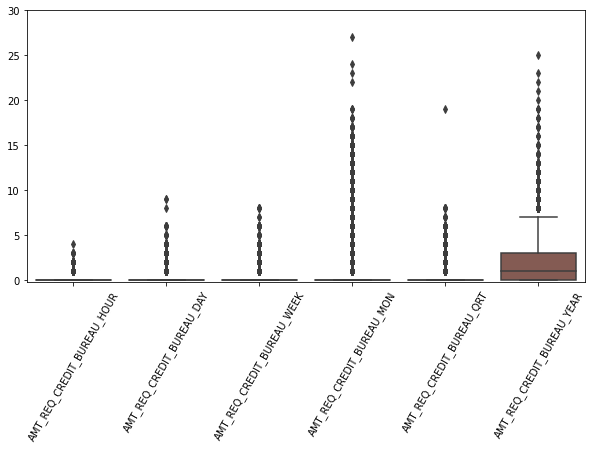

In [ ]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(data=df_app[data4],orient='v')
plt.ylim(-0.2,30)
plt.xticks(rotation=60)
plt.show()

We can see the same when plotted the boxplot for the identified columns and can see that high number of values getting plotted outside the whiskers of the boxplot.
Considering this the suitable value that we can use to impute the missing values in the columns would be the MEDIAN of the series data as its value will not be biased cause of outliers.

In [ ]:
df_app[[a for a in df_app.columns if 'DAYS' in a]].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


we can see these columns DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH and DAYS_LAST_PHONE_CHANGE have negative values which appears more like anomaly which may have occured while importing the data as negative value for DAYS_EMPLOYED does not make much sense.

using the abs() function on DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH and DAYS_LAST_PHONE_CHANGE to convert negative values to positive values.

In [ ]:
neg_cols = [a for a in df_app.columns if 'DAYS' in a]
for a in neg_cols:
    df_app[a] = df_app[a].apply(lambda c: abs(c/365))
    df_app.loc[df_app[a]>60,a] = 0
df_app[neg_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,36.606696,5.355748,13.658757,8.203294,2.637969
std,16.382031,6.320737,9.648314,4.135481,2.265229
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.528767,0.791781,5.504110,4.712329,0.750685
50%,38.961644,3.323288,12.339726,8.915068,2.073973
75%,48.689041,7.561644,20.490411,11.778082,4.301370
max,60.000000,49.073973,59.964384,19.717808,11.758904


In [ ]:
print(df_app['DAYS_EMPLOYED'].quantile(0.81))

9.161917808219194


In [ ]:
df_app[neg_cols].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,36.606696,5.355748,13.658757,8.203294,2.637969
std,16.382031,6.320737,9.648314,4.135481,2.265229
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.528767,0.791781,5.504110,4.712329,0.750685
50%,38.961644,3.323288,12.339726,8.915068,2.073973
75%,48.689041,7.561644,20.490411,11.778082,4.301370
max,60.000000,49.073973,59.964384,19.717808,11.758904


we have observed from above statistics that DAYS_EMPLOYED columns has max value as 1000 years which clearly outlier and it appears as human error. We have removed that value from the dataset but can see that there is significant different between the max value and 75 percentile value of the dataset, which suggest that there are outliers. If required to impute the missing values for this column then clearly we cannot use MEAN as the max vlaue will effect the value and using MEDIAN would be optimial choice.

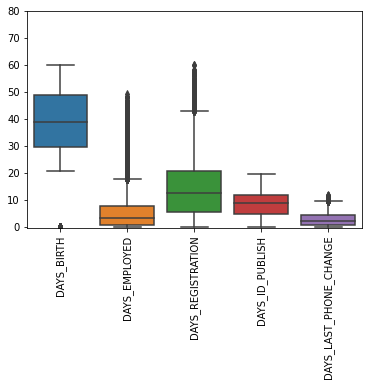

In [ ]:
fig = figsize=(10,10)
sns.boxplot(data=df_app[neg_cols],orient='v')
plt.ylim(-0.5,80)
plt.xticks(rotation=90)
plt.show()

###3.4 Binning

For the binning we have selected these 3 columns 'AMT_CREDIT', 'DAYS_REGISTRATION' and 'AMT_ANNUITY' and subsequently we will be creating 

In [ ]:
df_app[['AMT_CREDIT', 'DAYS_REGISTRATION', 'AMT_ANNUITY']].describe()

,AMT_CREDIT,DAYS_REGISTRATION,AMT_ANNUITY
count,3.075110e+05,307511.000000,307499.000000
mean,5.990260e+05,13.658757,27108.573909
std,4.024908e+05,9.648314,14493.737315
min,4.500000e+04,0.000000,1615.500000
25%,2.700000e+05,5.504110,16524.000000
50%,5.135310e+05,12.339726,24903.000000
75%,8.086500e+05,20.490411,34596.000000
max,4.050000e+06,59.964384,258025.500000


In [ ]:
val_bins=[0,5,10,15,20,25,30,35,40,np.inf]
val_labels=['0-5 years', '10-15 years', '5-10 years', '15-20 years', '20-25 years', '25-30 years', '30-35 years', '35-40 years', 'More than 40 years']
df_app['DAYS_REGISTRATION_GROUP'] = pd.cut(df_app['DAYS_REGISTRATION'],bins=val_bins,labels=val_labels)
df_app['DAYS_REGISTRATION_GROUP'].value_counts()

0-5 years             71521
5-10 years            58692
10-15 years           54614
15-20 years           41965
20-25 years           36495
25-30 years           25096
30-35 years           11908
35-40 years            5409
More than 40 years     1722
Name: DAYS_REGISTRATION_GROUP, dtype: int64

In [ ]:
val_bins=[0,df_app['AMT_CREDIT'].quantile(0.25),df_app['AMT_CREDIT'].quantile(0.75),np.inf]
val_labels=['LOW','MEDIUM','HIGH']
df_app['AMT_CREDIT_GROUP'] = pd.cut(df_app['AMT_CREDIT'],bins=val_bins,labels=val_labels)
df_app['AMT_CREDIT_GROUP'].value_counts()

MEDIUM    153214
LOW        78421
HIGH       75876
Name: AMT_CREDIT_GROUP, dtype: int64

In [ ]:
val_bins=[0,df_app['AMT_ANNUITY'].quantile(0.25),df_app['AMT_ANNUITY'].quantile(0.75),np.inf]
val_labels=['LOW','MEDIUM','HIGH']
print(val_bins)
df_app['AMT_ANNUITY_GROUP'] = pd.cut(df_app['AMT_ANNUITY'],bins=val_bins,labels=val_labels)
df_app['AMT_ANNUITY_GROUP'].value_counts()

[0, 16524.0, 34596.0, inf]


MEDIUM    153842
LOW        76893
HIGH       76764
Name: AMT_ANNUITY_GROUP, dtype: int64

##4. Database split into Target 0 and Target 1

In [ ]:
#Splitting of the current application dataset to Target 0 and Target 1
df_app_target_0 = df_app[df_app['TARGET'] == 0]
df_app_target_1 = df_app[df_app['TARGET'] == 1]

In [ ]:
print('DataFrame df_app_target_0 with TARGET = 0:\nrows={0} columns={1}\n'.format(df_app_target_0.shape[0],df_app_target_0.shape[1]))
print('DataFrame df_app_target_1 with TARGET = 1:\nrows={0} columns={1}'.format(df_app_target_1.shape[0],df_app_target_1.shape[1]))

DataFrame df_app_target_0 with TARGET = 0:
rows=282686 columns=84

DataFrame df_app_target_1 with TARGET = 1:
rows=24825 columns=84


In [ ]:
df_app_target_1.shape[0]+df_app_target_0.shape[0] == df_app.shape[0] #Check if no data is lost inadvertently

True

##5. Initial Analysis

5.1  Imbalance

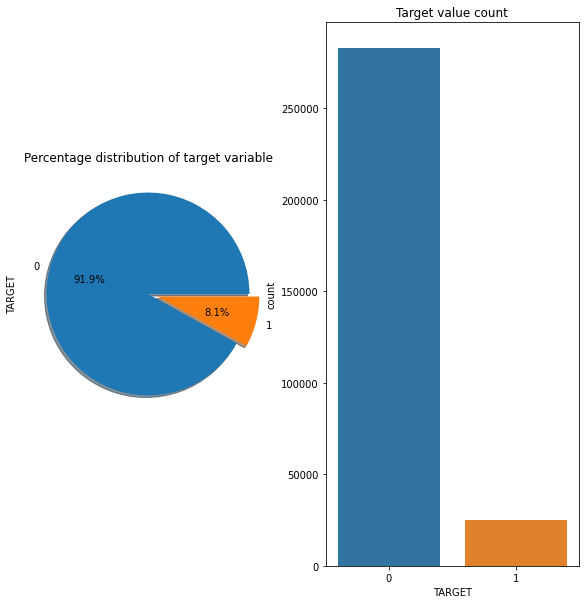

In [ ]:
plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
df_app['TARGET'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0,0.1], shadow=True)
plt.title('Percentage distribution of target variable')
plt.subplot(1,2,2)
sns.countplot(df_app['TARGET'])
plt.title('Target value count')
plt.show()

It is evident from the plots that there is 8% of no values in target and is vey less compared to Yes values.

Hence, we need to drill down and analyse the target data with each fields like Gender,Education,Employment_type, Income to get more insights

##6. Univariate and segmented analysis for categorical variables 

In [ ]:
def univariate_plots(col,target0,target1):

  Total = df_app[col].value_counts().sort_index()
  
  category_perc_0 = df_app_target_0[col].value_counts().sort_index()*100/Total
  category_perc_0 = category_perc_0.reset_index()

  category_perc_1 = df_app_target_1[col].value_counts().sort_index()*100/Total
  category_perc_1 = category_perc_1.reset_index()

  # print(category_perc_0)
  # print(category_perc_1)
  if len(Total.value_counts().index) < 20:
    plt.figure(figsize=[20,5])
    sns.set_style("whitegrid")

    plt.subplot(1,3,1)
    sns.countplot(df_app[col], palette="summer")
    plt.title('Counts by values for '+col)
    plt.xticks(rotation=-90)

    plt.subplot(1,3,2)
    sns.barplot(x='index',y=col,orient='v',data=category_perc_0)
    plt.title('Target 0 percentage for '+col)
    plt.xlabel(col)
    plt.xticks(rotation=-90)

    plt.subplot(1,3,3)
    sns.barplot(x='index',y=col,orient='v',data=category_perc_1)
    plt.title('Target 1 percentage for '+col)
    plt.xlabel(col)
    plt.ylabel(col+' Percetage %')
    plt.xticks(rotation=-90)
    plt.show()
  
  else:
    plt.figure(figsize=[25,50])
    sns.set_style("whitegrid")

    plt.subplot(3,1,1)
    sns.countplot(df_app[col], palette="summer")
    plt.title('Counts by values for '+col)
    plt.xticks(rotation=-90)

    plt.subplot(3,1,2)
    sns.barplot(x='index',y=col,orient='v',data=category_perc_0)
    plt.title('Target 0 percentage for '+col)
    plt.xlabel(col)
    plt.xticks(rotation=-90)

    plt.subplot(3,1,3)
    sns.barplot(x='index',y=col,orient='v',data=category_perc_1)
    plt.title('Target 1 percentage for '+col)
    plt.xlabel(col)
    plt.ylabel(col+' Percetage %')
    plt.xticks(rotation=-90)
    plt.show()

####6.1 Analysis by Gender

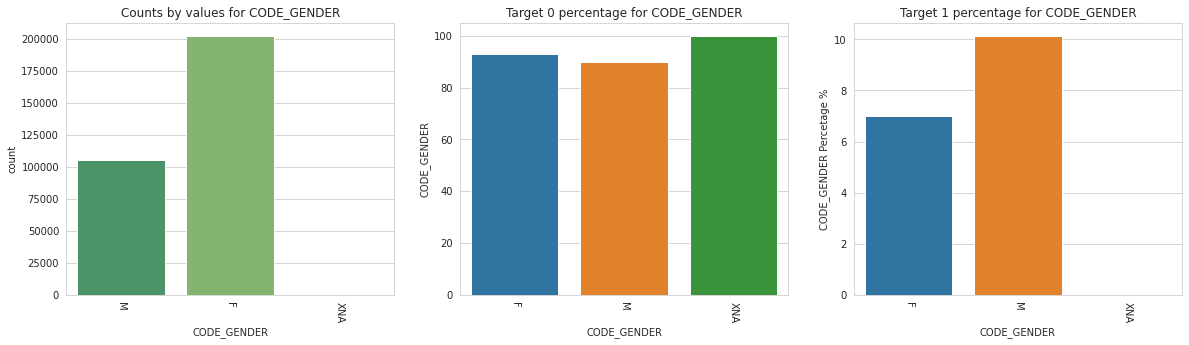

In [ ]:
univariate_plots('CODE_GENDER',df_app_target_0,df_app_target_1)

###### There is a high number of female customers compared to male in the application dataset.
Although both males and female in target 0 have equal percentage of paying back, the plot for target value 1, shows that a higher percentage of males face difficulty in paying back the loans

####6.2 Analysis by Education type

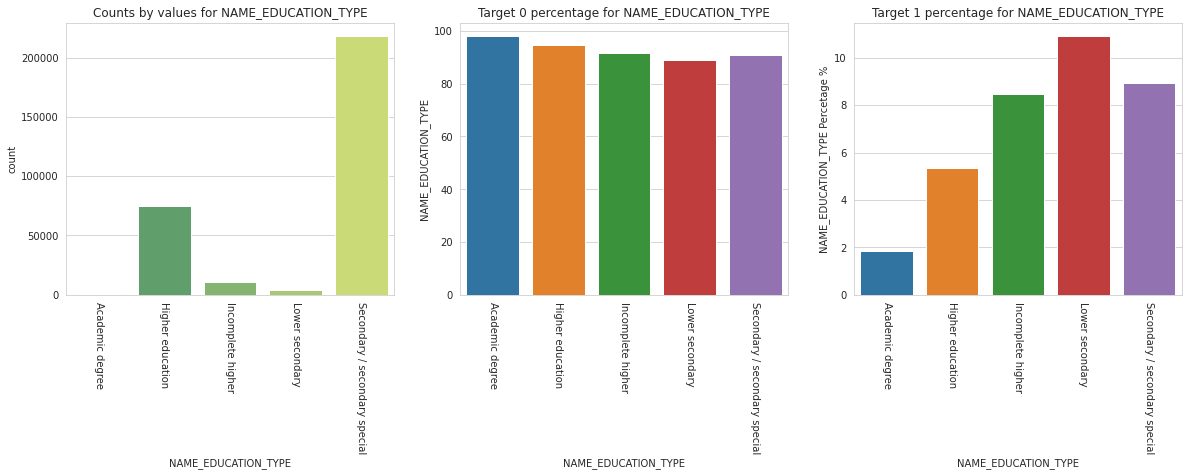

In [ ]:
univariate_plots('NAME_EDUCATION_TYPE',df_app_target_0,df_app_target_1)

The plot shows that in target 1 (client with pay difficulties), the lower secondary educated clients have a higher rate of default followed by Secondary and Incomplete higher. This is apparent since lower the education level, lower the chance of getting a high paid permanent job, hence lesser the chance of repaying the loans 

###6.3 Analysis by Marital status

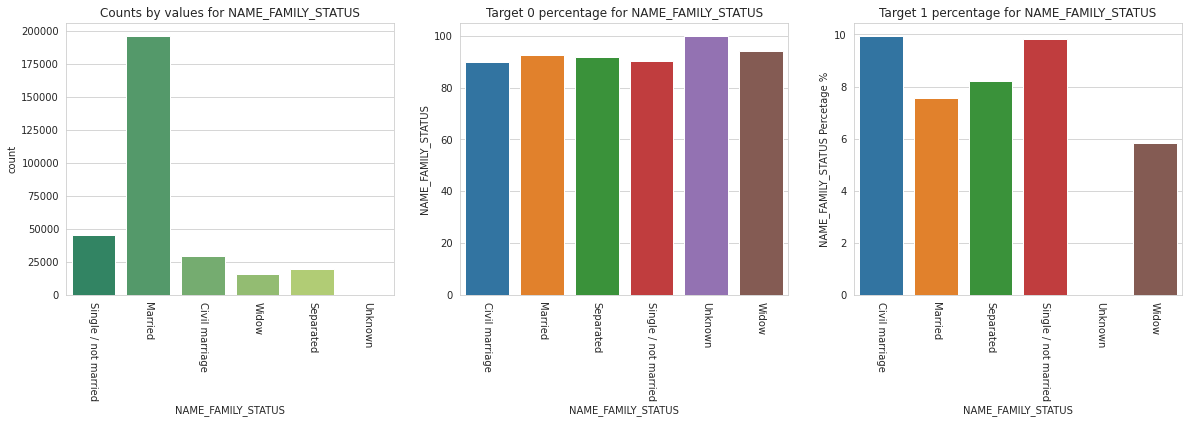

In [ ]:
univariate_plots('NAME_FAMILY_STATUS',df_app_target_0,df_app_target_1)

Most of clients are married, followed by Single/not married and civil marriage.

In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%) followed by Single and separated and Widow being the lowest (exception being Unknown).

###6.4 Analysis by Loan type

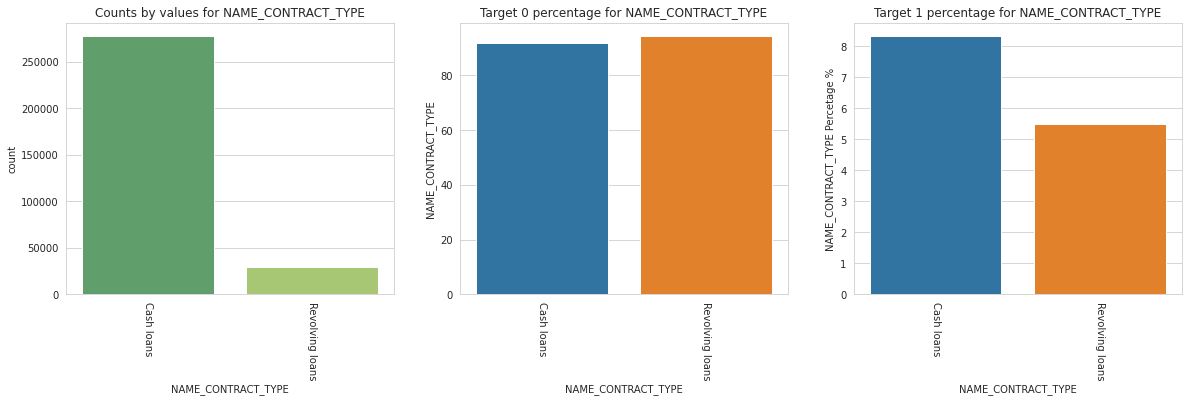

In [ ]:
univariate_plots('NAME_CONTRACT_TYPE',df_app_target_0,df_app_target_1)

The highest type of loans given out was clash loans. The plot shows that the most defaults happened in the same

###6.5 Analysis by number of children that the clients have

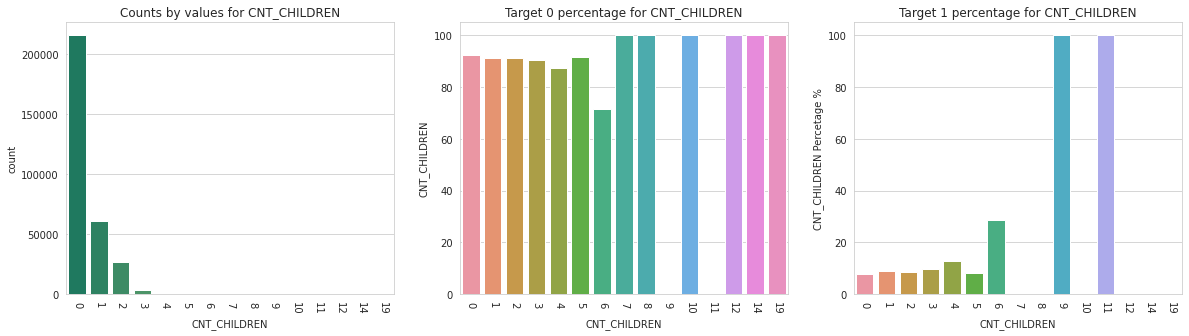

In [ ]:
univariate_plots('CNT_CHILDREN',df_app_target_0,df_app_target_1)

Most of the clients taking loans do not have children. This correlates with the Single clients being the highest in number. As the number of clients increases there is a vague trend of default being higher.

Clients with no children, 1, 2, 3, and 5 children have around 10% repayment defaults. The clients with 4 and 6 children are above average in terms of percent of not paid back loans (over 25% for families with 6 children).

As for clients with 9 or 11 children, the percent of loans not repaid is 100%.

###6.6 Analysis by number of family members that the clients have

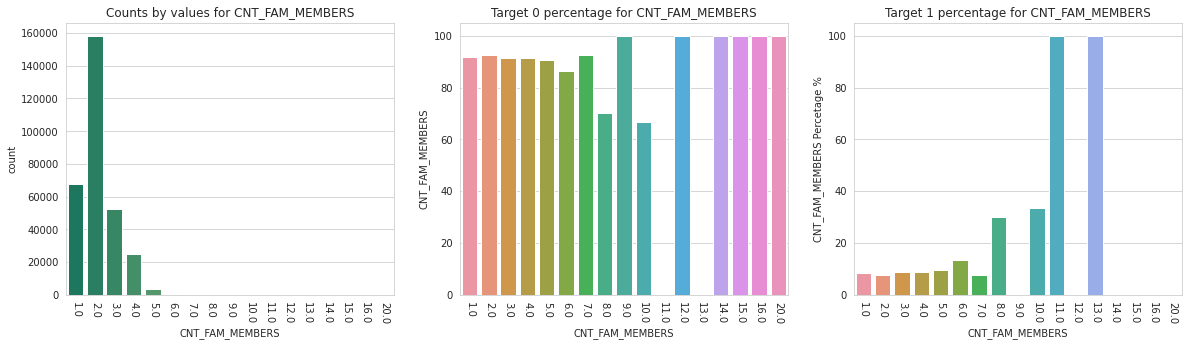

In [ ]:
univariate_plots('CNT_FAM_MEMBERS',df_app_target_0,df_app_target_1)

Most of the clients have 2 family members followed by 1 and 3.

Same as number of children, we can see an increrasing trend in loan default as the number of family members increase.

Clients with family members of 11 and 13 have 100% default rate. Other families with 10 or 8 members have percents of not repayment of loans over 30%. Families with 6 or less members have repayment rates close to the 10%.

###6.7 Analysis by Income type of clients

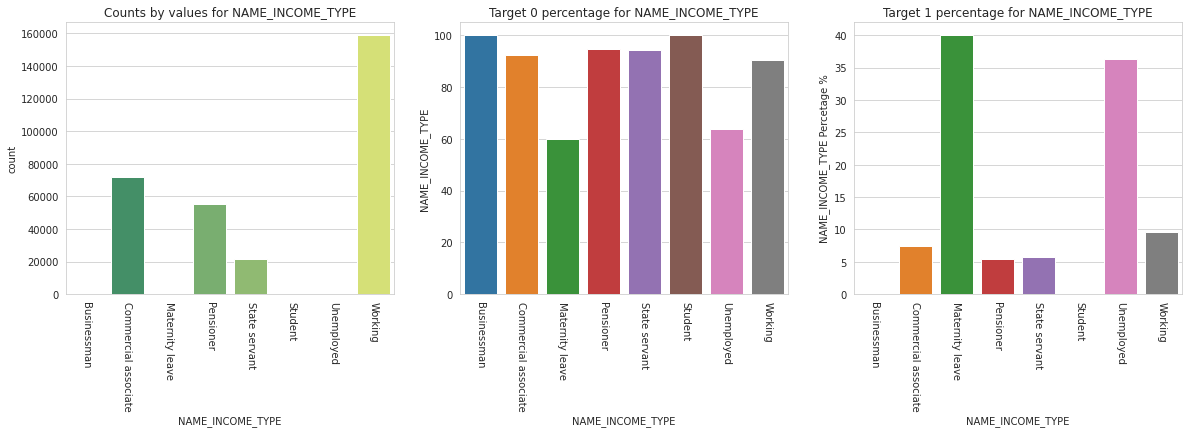

In [ ]:
univariate_plots('NAME_INCOME_TYPE',df_app_target_0,df_app_target_1)

Most loans were provided to Working class as it makes sense followed by commercial associates and pensioners.

As far as non repayment is concerned, People in maternity leave and Unemployed have over 35% of defauult rate. The default rate is lowest among the State Servant and pensioner 

###6.8 Analysis by Occupation of clients

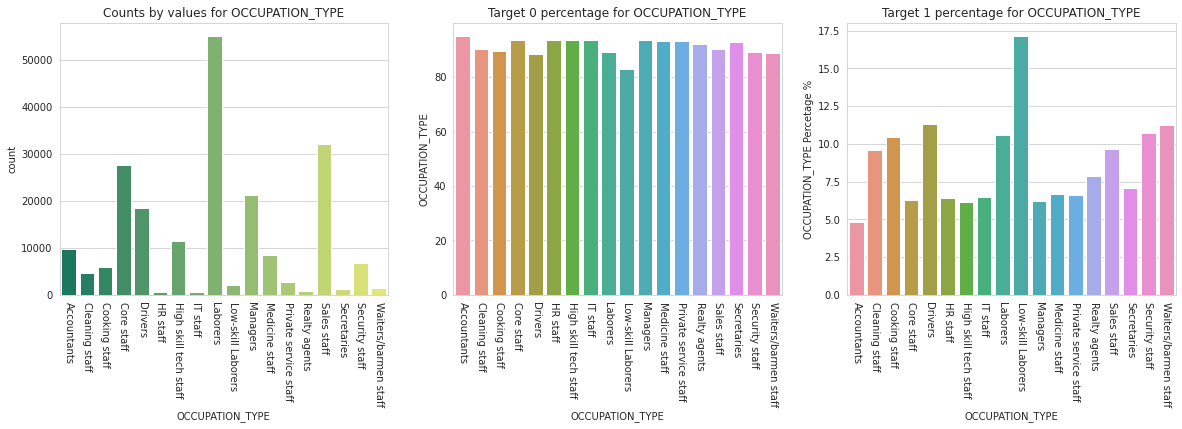

In [ ]:
univariate_plots('OCCUPATION_TYPE',df_app_target_0,df_app_target_1)

From the occupation plots, it seems that the Labourers has taken the highest number of loans followed by the Core staff, Managers and Drivers

In case of repayment, Low skill labourers have around 17% default rate followed by Drivers and Waiters/barmen. THe average rate of default is around 6.5% accross categories

###6.9 Analysis by Organization type of clients

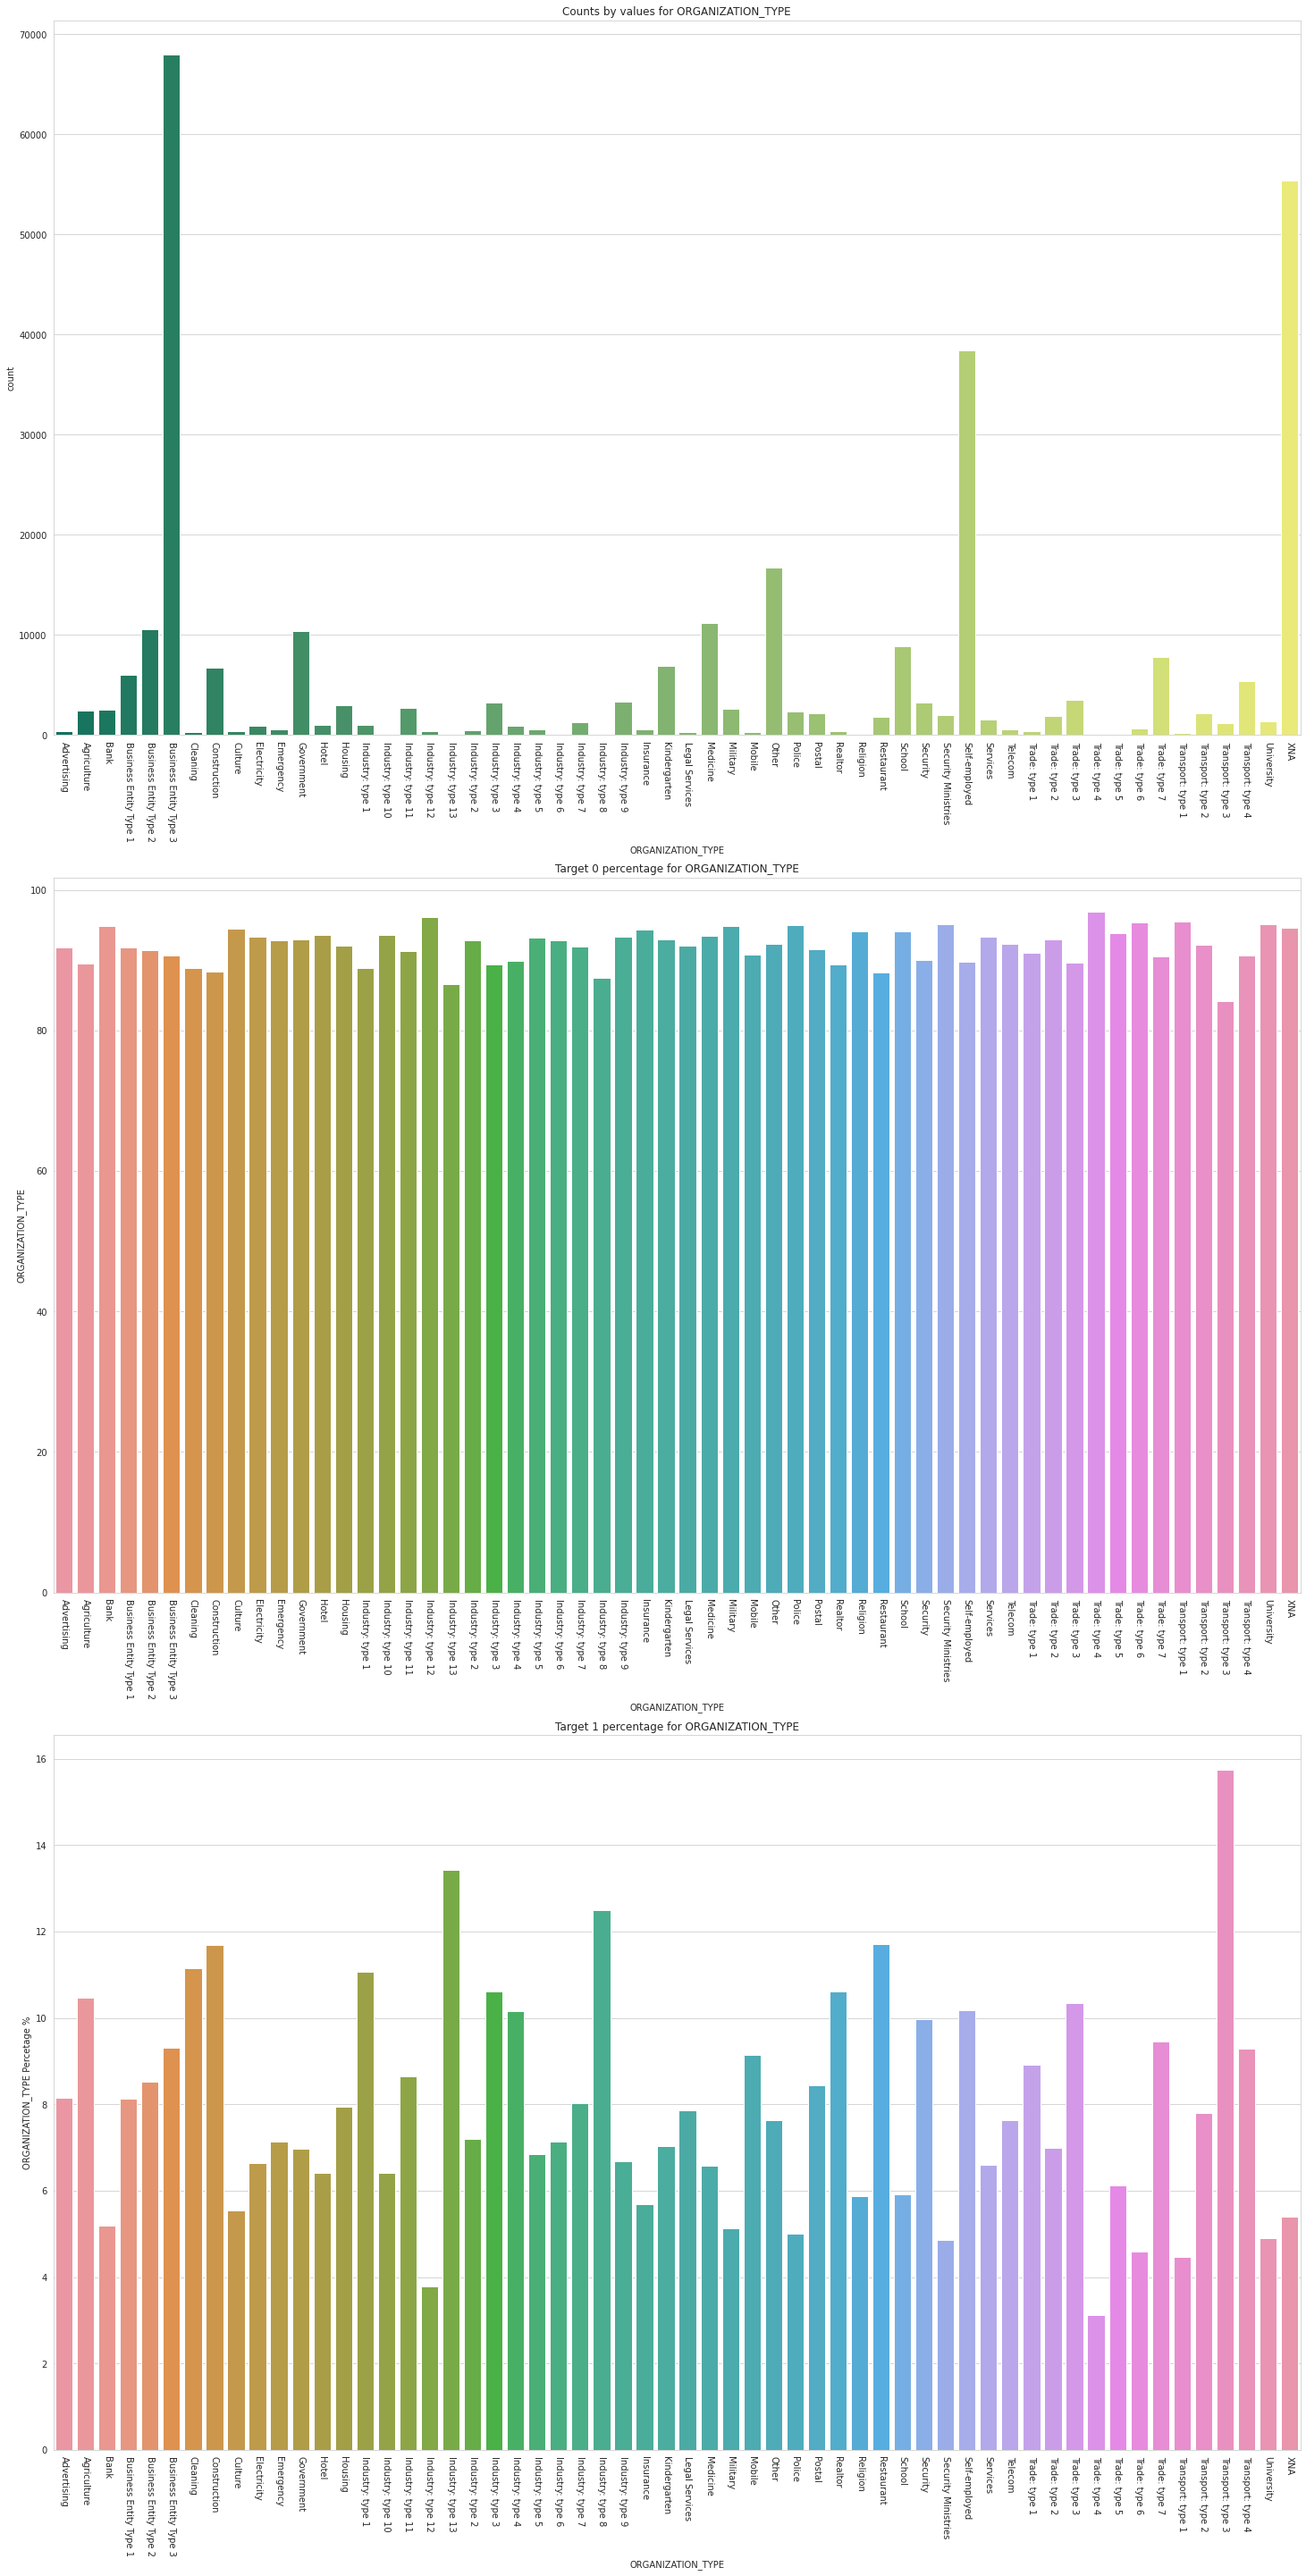

In [ ]:
univariate_plots('ORGANIZATION_TYPE',df_app_target_0,df_app_target_1)

Sectors with highest default rate are Transport- type 3, Industry- type 13, Industry- type 8 and Restaurant

###6.10 Analysis by Car ownership of client

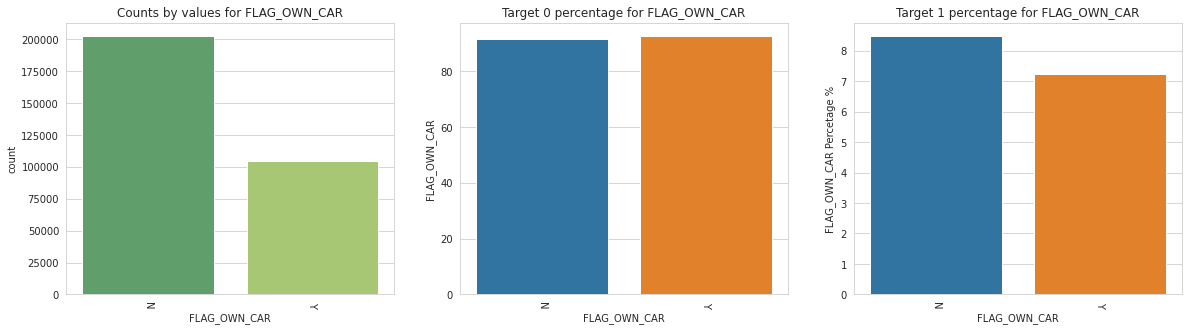

In [ ]:
univariate_plots('FLAG_OWN_CAR',df_app_target_0,df_app_target_1)

People who do not own a car are given higher number of loans.

The clients without a car have defaulted around 9.5% compared to the ones with car at 7.1%

###6.11 Analysis by Flat or house ownership of client

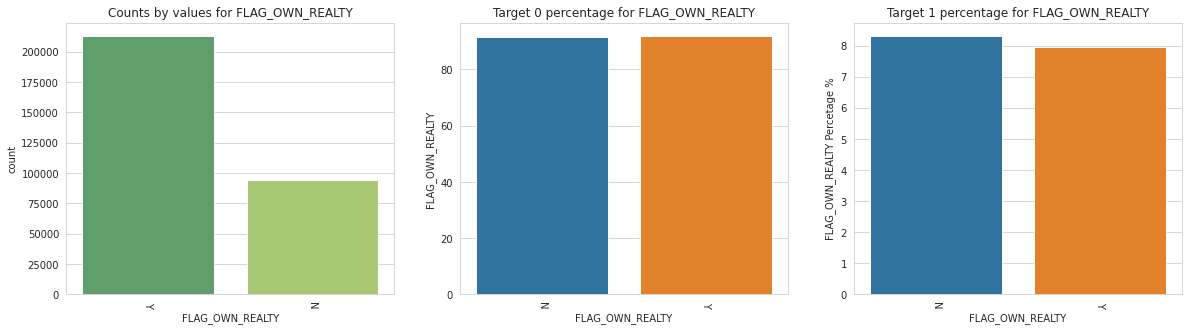

In [ ]:
univariate_plots('FLAG_OWN_REALTY',df_app_target_0,df_app_target_1)

People who own a house/flat are given higher number of loans.

However both has equal percetage of default rate

###6.12 Analysis by hosuing type of client

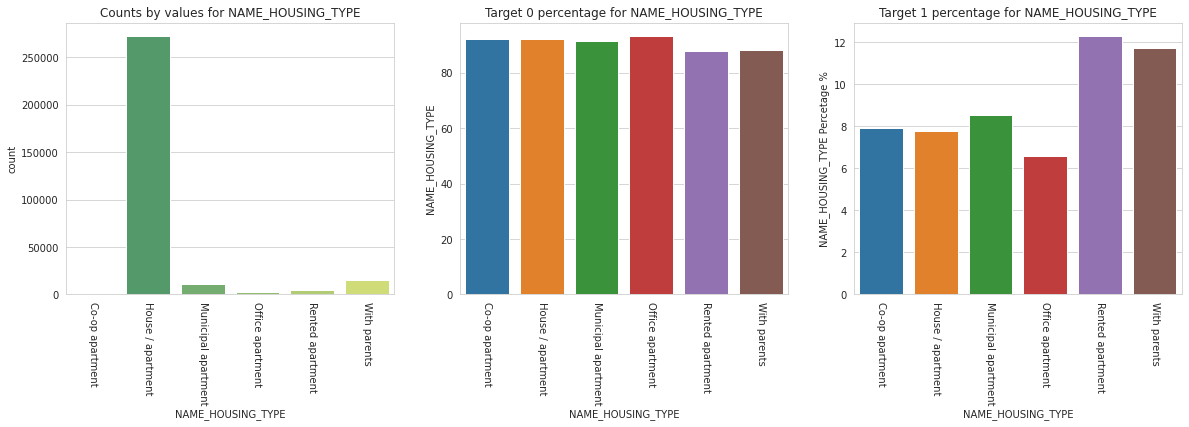

In [ ]:
univariate_plots('NAME_HOUSING_TYPE',df_app_target_0,df_app_target_1)

Most of the clients applied for loan has a house/apartment.

Of which Rented and with parents have around 12% of default rate

###6.13 Analysis by REG_CITY_NOT_LIVE_CITY

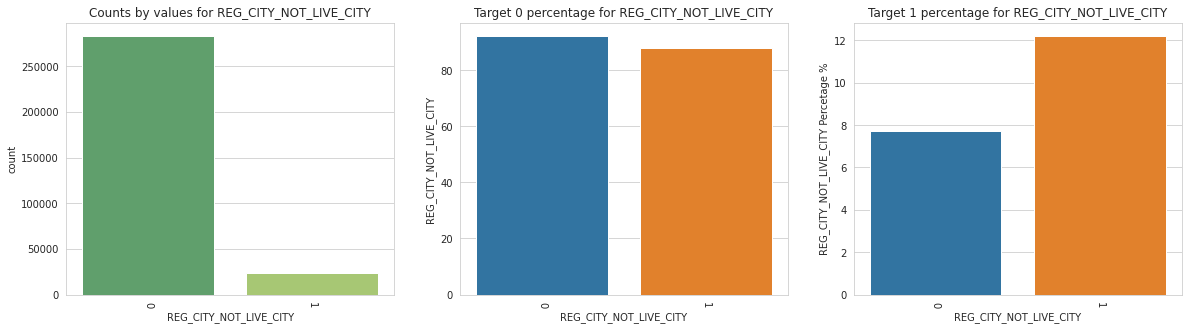

In [ ]:
univariate_plots('REG_CITY_NOT_LIVE_CITY',df_app_target_0,df_app_target_1)

Most of the loans were give to client who has the permanent address as the same as the contact address. The client with address difference has a higher pecentage of default(~12%)

###6.14 Analysis by REG_CITY_NOT_WORK_CITY

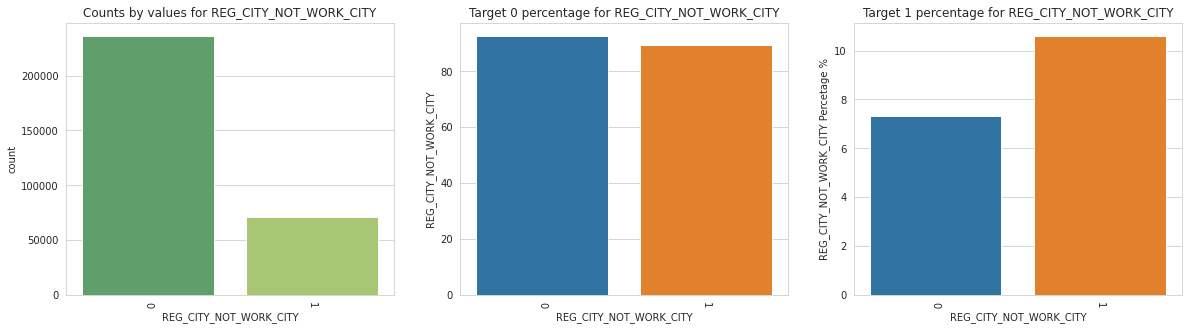

In [ ]:
univariate_plots('REG_CITY_NOT_WORK_CITY',df_app_target_0,df_app_target_1)

Most of the loans were give to client who has the permanent address as the same as the work address. The client with address difference has a higher pecentage of default(~11%)

##7. Feature wise analysis of continuous variables

In [ ]:
def continuous_plots(col,target0,target1):

  sns.set_style('whitegrid')

  plt.figure(figsize=[30,8])

  plt.subplot(1,2,1)
  plt.title("Univariate Distribution of "+col)
  sns.distplot(df_app[col].dropna())

  plt.subplot(1,2,2)
  plt.title("Distribution of "+col+" for target 0 and target 1")
  sns.kdeplot(target0[col], label="TARGET = 0")
  sns.kdeplot(target1[col], label="TARGET = 1")
  plt.show()

####7.1 Analysis of Annuity amount

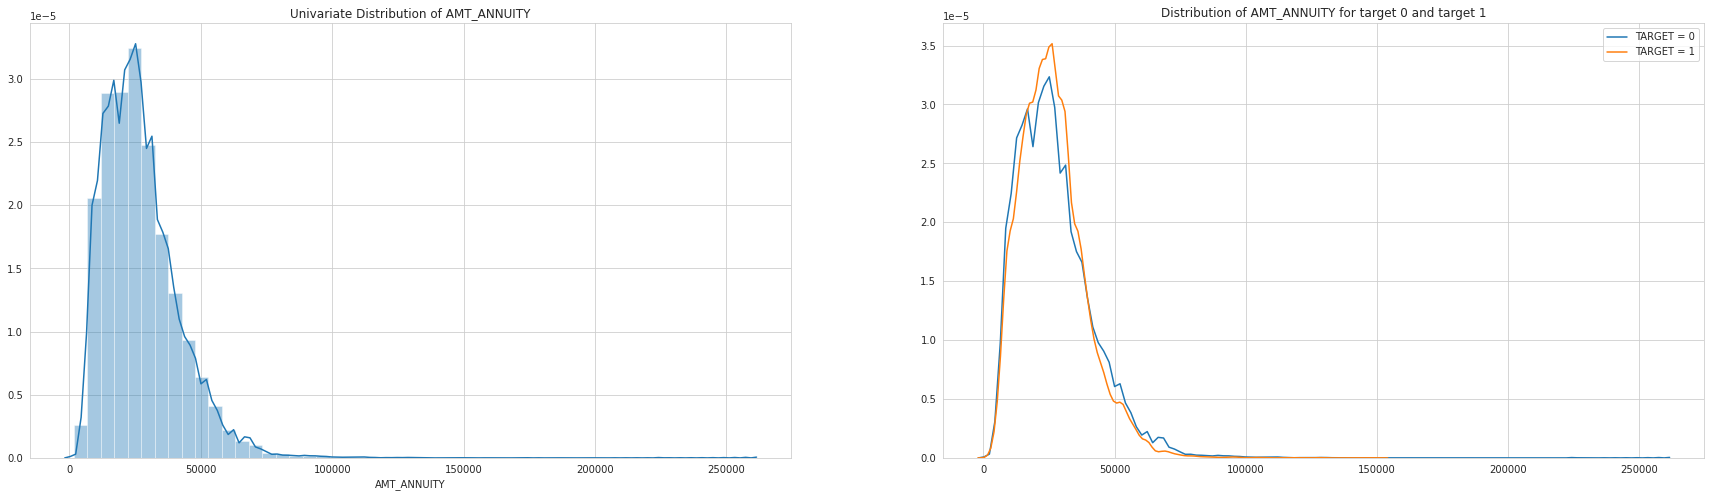

In [ ]:
continuous_plots('AMT_ANNUITY',df_app_target_0,df_app_target_1)

The distribution of AMT_ANNUITY for target 0 and target 1 is similar. Hence there is no observed effect of annuity amount loan default

####7.2 Analysis of Credit amount

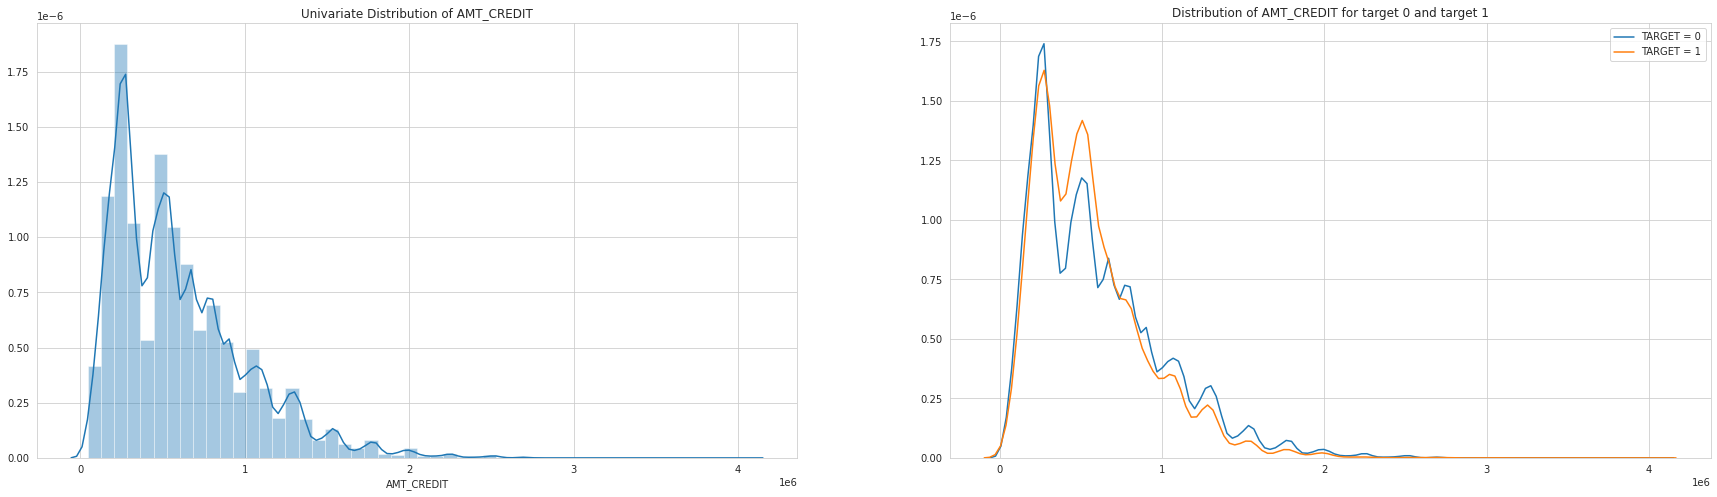

In [ ]:
continuous_plots('AMT_CREDIT',df_app_target_0,df_app_target_1)

The distribution of AMT_ANNUITY for target 0 and target 1 is similar. Hence there is no observed effect of credit amount loan default

####7.3 Analysis of Income amount

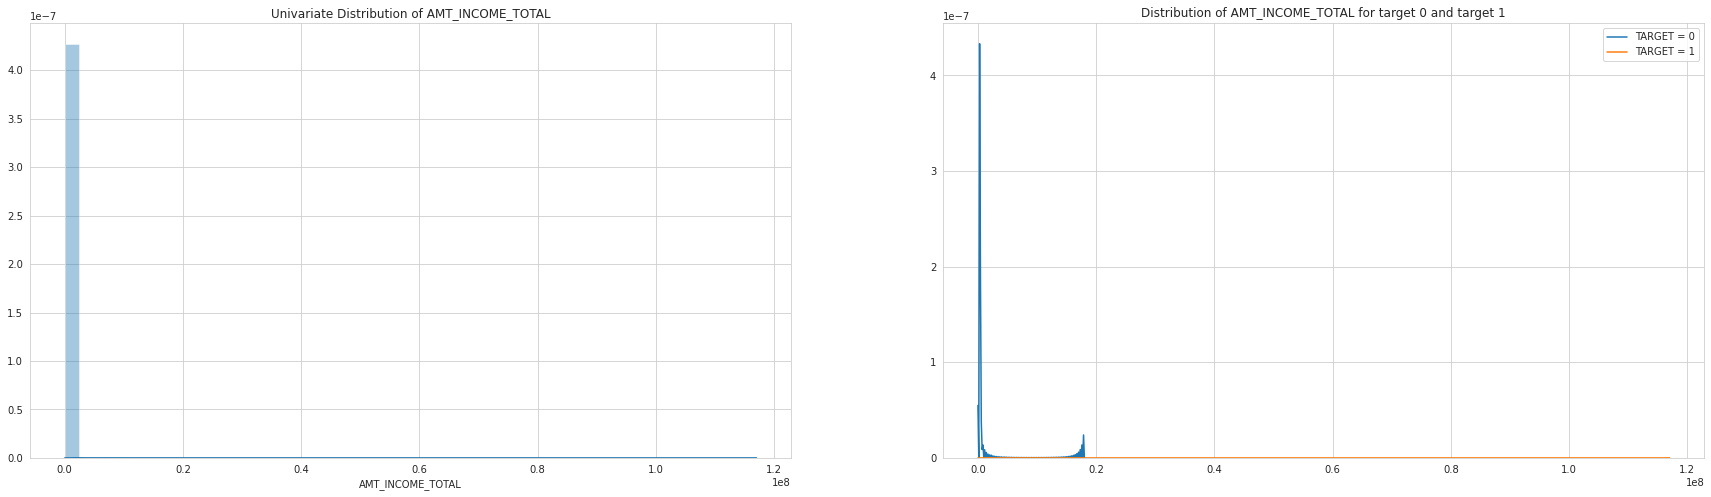

In [ ]:
continuous_plots('AMT_INCOME_TOTAL',df_app_target_0,df_app_target_1)

####7.4 Analysis of Goods price

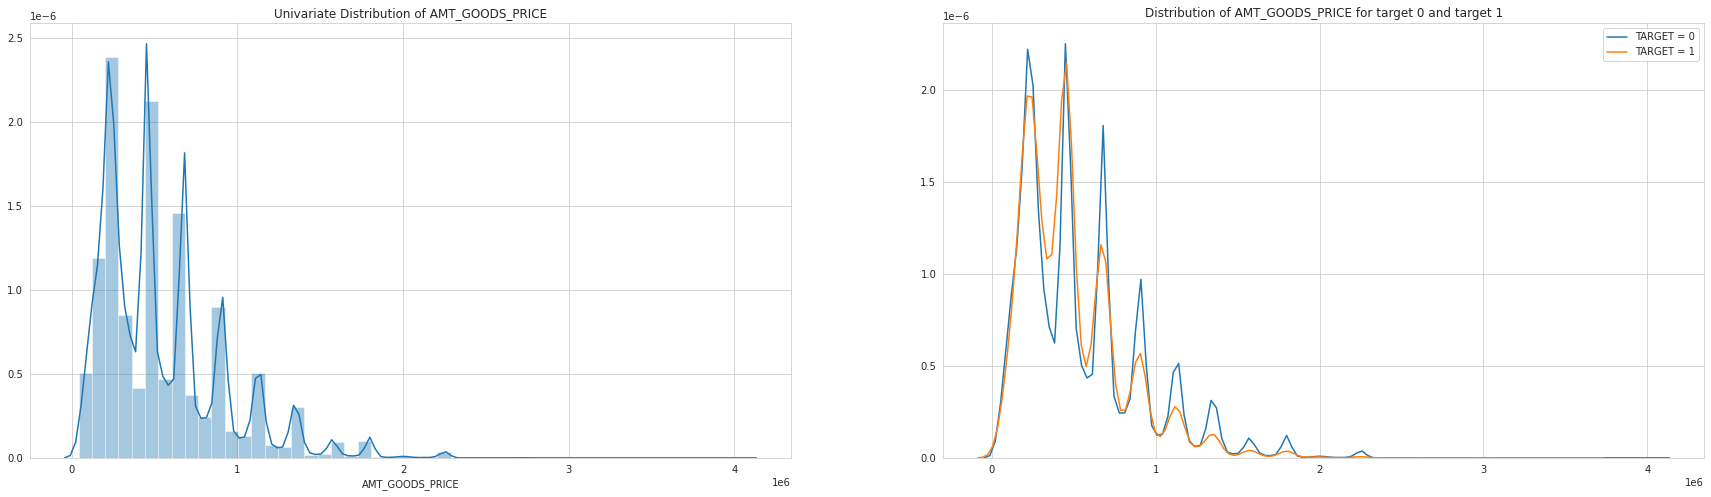

In [ ]:
continuous_plots('AMT_GOODS_PRICE',df_app_target_0,df_app_target_1)

Both target 0 and target 1 have similar distributions

####7.5 Analysis of Days from birth

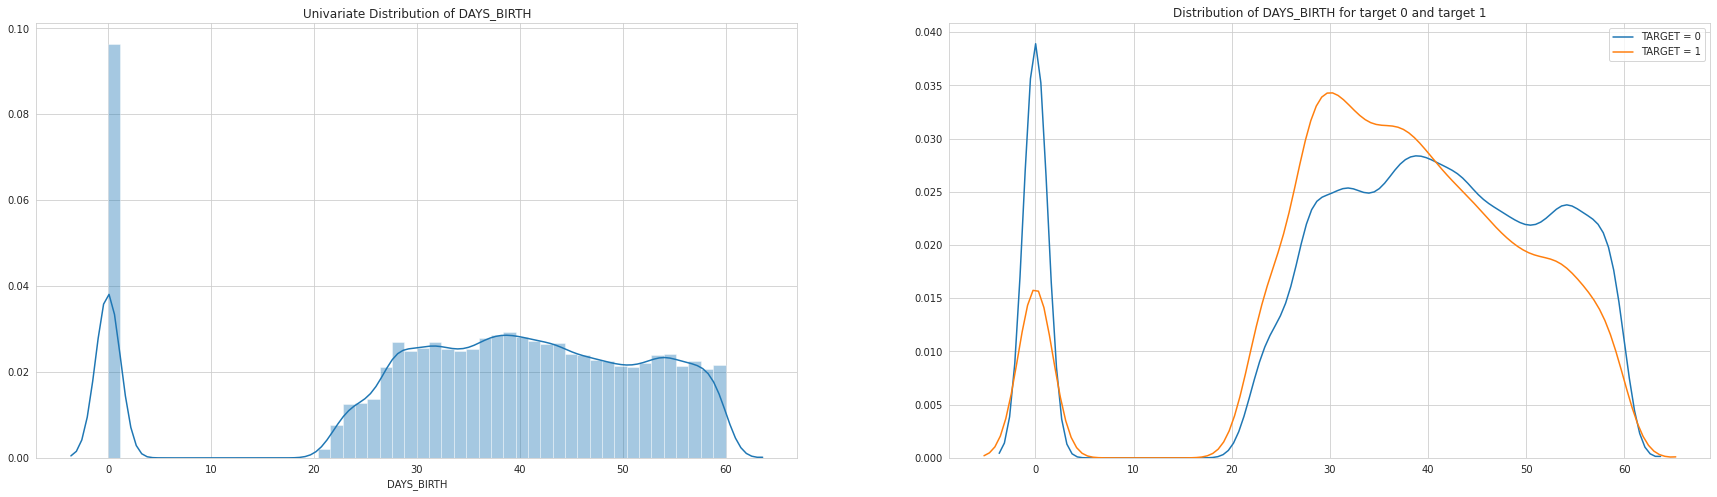

In [ ]:
continuous_plots('DAYS_BIRTH',df_app_target_0,df_app_target_1)

From the distribution, it seems that the younger clients have a higher count of default.

####7.6 Analysis of DAYS EMPLOYED

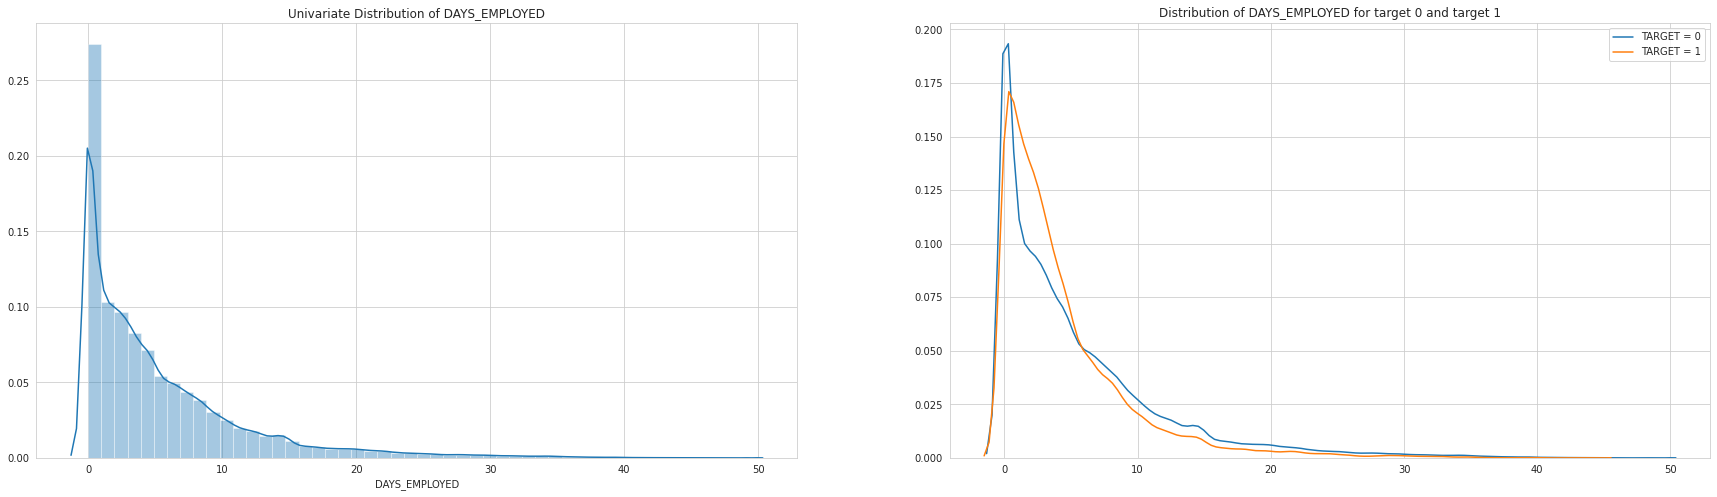

In [ ]:
continuous_plots('DAYS_EMPLOYED',df_app_target_0,df_app_target_1)

The target 0 and target 1 values for DAYS_EMPLOYED has a similar distribution

####7.7 Analysis of DAYS ID Published

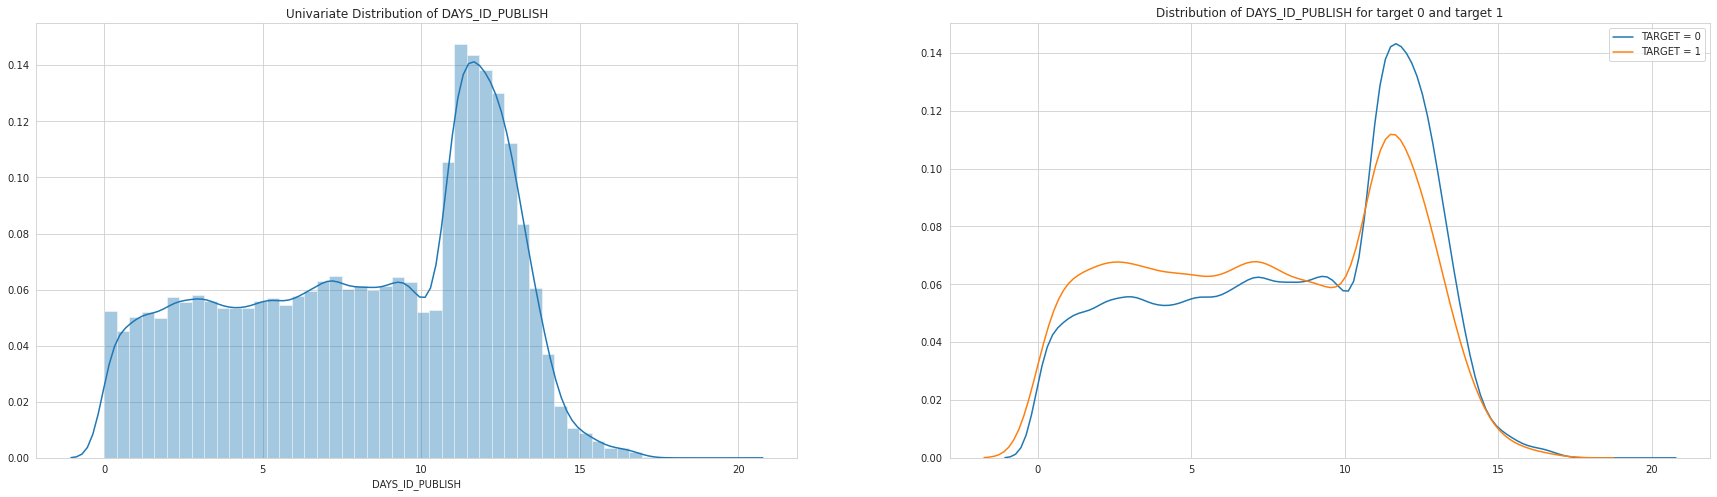

In [ ]:
continuous_plots('DAYS_ID_PUBLISH',df_app_target_0,df_app_target_1)

The distribution shows that the earlier the client changes the identity information, the lower the default rate

####7.8 Analysis of DAYS_LAST_PHONE_CHANGE

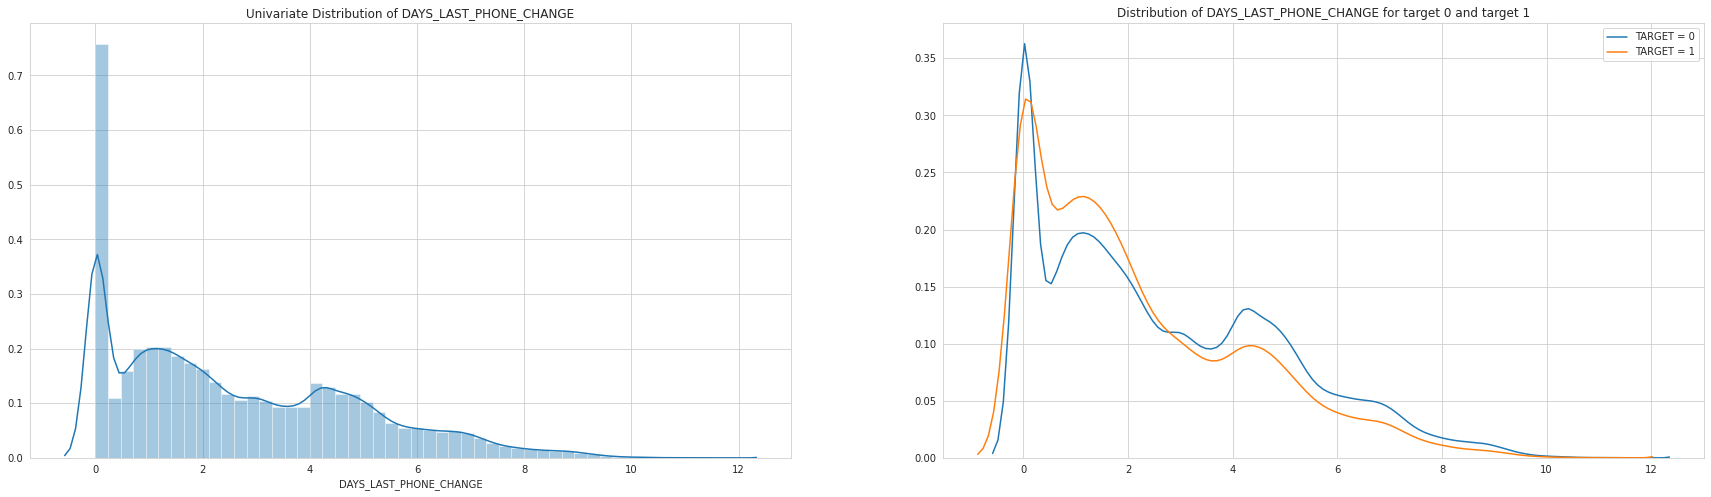

In [ ]:
continuous_plots('DAYS_LAST_PHONE_CHANGE',df_app_target_0,df_app_target_1)

The target 0 and target 1 values for DAYS_LAST_PHONE_CHANGE has a similar distribution

####7.9 Analysis of DAYS_REGISTRATION

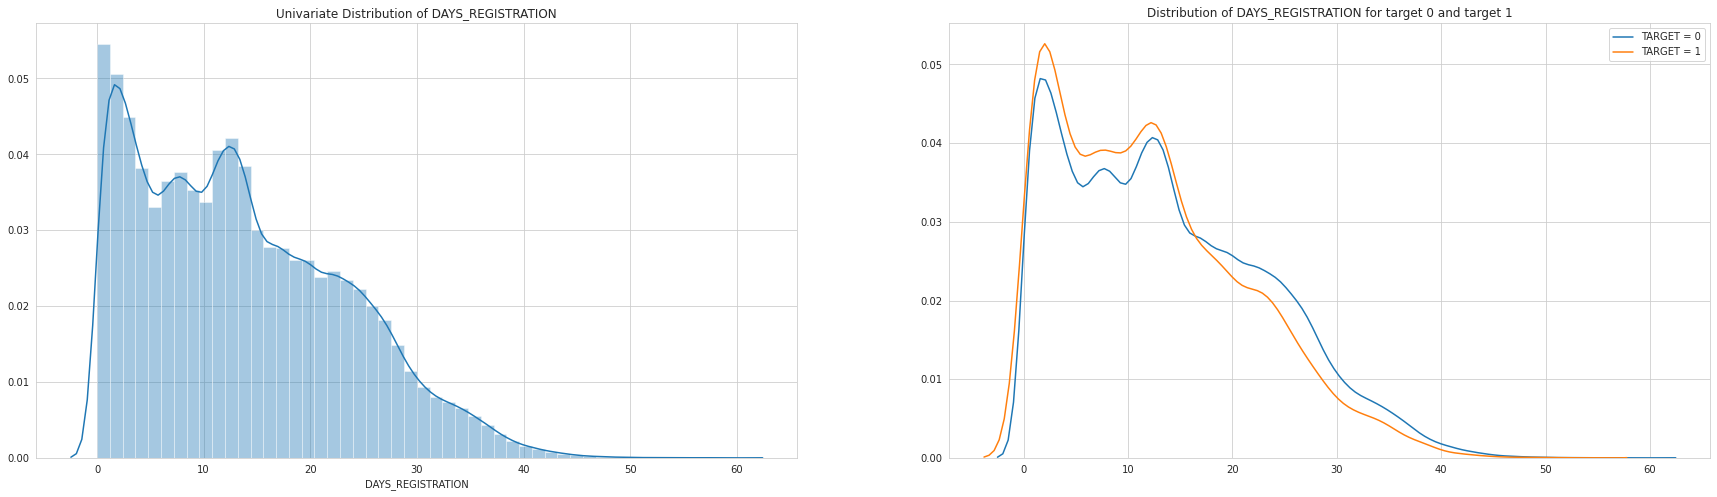

In [ ]:
continuous_plots('DAYS_REGISTRATION',df_app_target_0,df_app_target_1)

###7.10 Bivariate analysis of selected Continuous variables using box plots

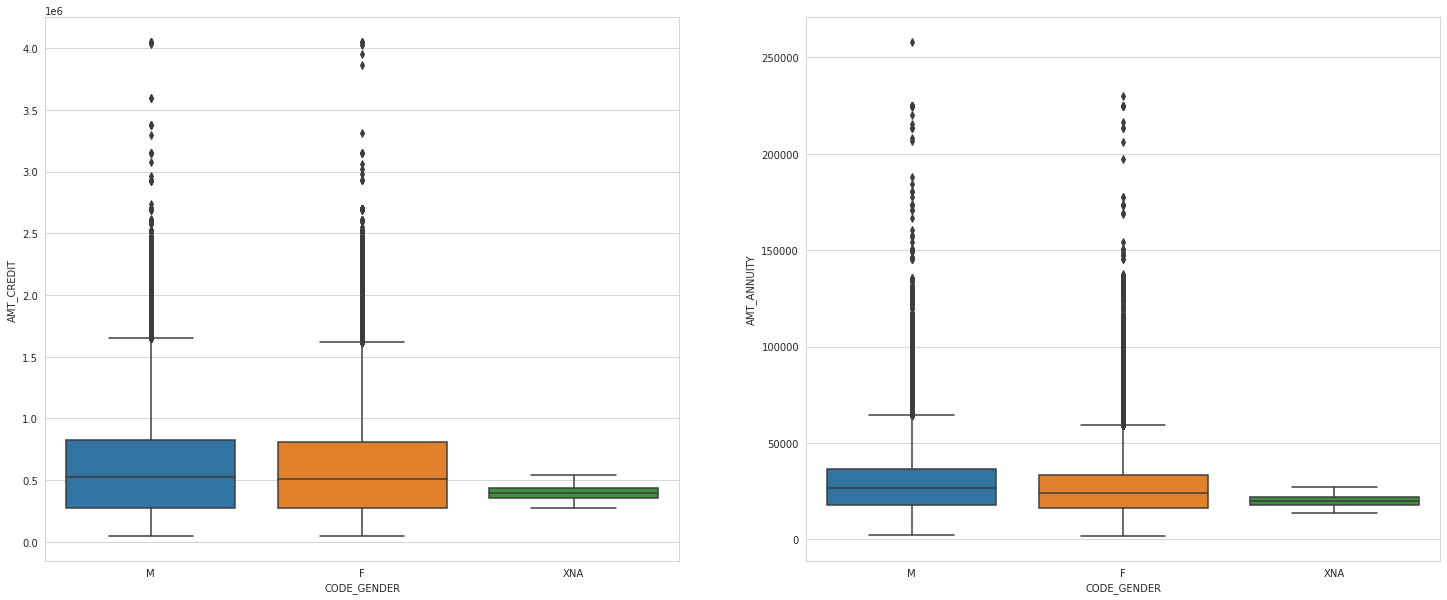

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.boxplot(x=df_app['CODE_GENDER'], y=df_app['AMT_CREDIT'])

plt.subplot(1,2,2)
sns.boxplot(x=df_app['CODE_GENDER'], y=df_app['AMT_ANNUITY'])
plt.show()

Both the distribution of Annuity and Credit amount fo male and female seems to have a similar distribution

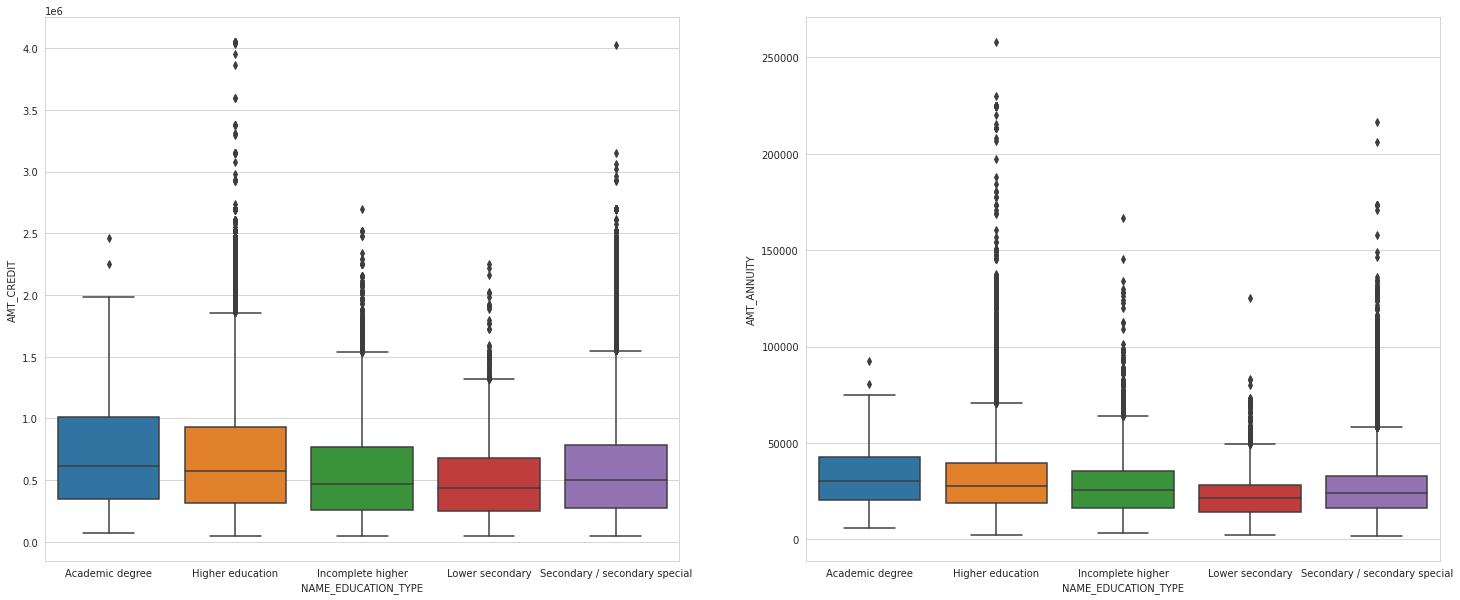

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.boxplot(x=df_app['NAME_EDUCATION_TYPE'], y=df_app['AMT_CREDIT'])

plt.subplot(1,2,2)
sns.boxplot(x=df_app['NAME_EDUCATION_TYPE'], y=df_app['AMT_ANNUITY'])
plt.show()

Clients with Academic degree seems to take loans for higher amount and hence pay higher annuity. Lower secondary seems to take loans for a lower amount comparatively

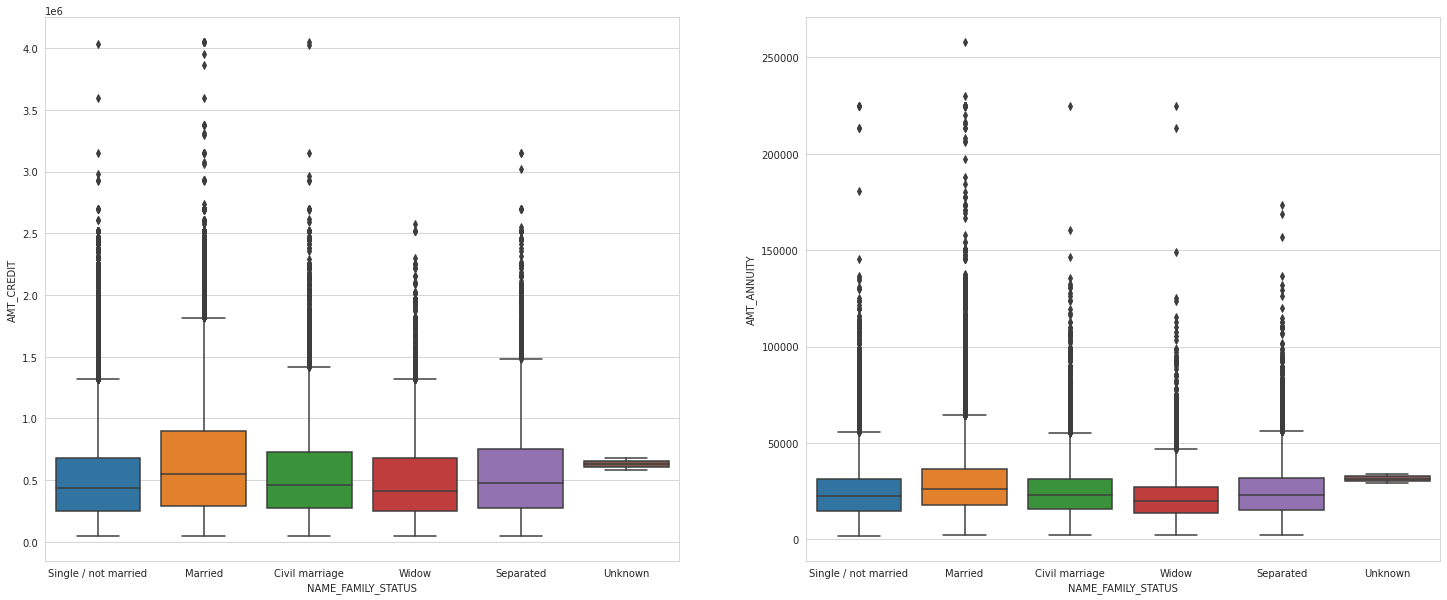

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.boxplot(x=df_app['NAME_FAMILY_STATUS'], y=df_app['AMT_CREDIT'])

plt.subplot(1,2,2)
sns.boxplot(x=df_app['NAME_FAMILY_STATUS'], y=df_app['AMT_ANNUITY'])
plt.show()

Married clients are taking a higher credit of loans but the annuity seems to be same as other segments of marital status

##8. Correlation

###8.1 Correlation of the selected continuos and discrete features

Correlation for numerical columns with two different files Target 0 and 1
Below are the selected columns.

'CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE'

In [ ]:
def corr_func(data,continuous_vars):

  corr_0 = data[continuous_vars].corr()

  corr_0 = corr_0.where(np.triu(np.ones(corr_0.shape), k=-1).astype(np.bool))
  corr_0 = corr_0.unstack().reset_index().dropna(axis=0)
  corr_0.columns = ['VAR1', 'VAR2', 'Correlation']
  corr_0['Correlation absolute'] = abs(corr_0['Correlation'])
  corr_0 = corr_0.sort_values(by = 'Correlation absolute', ascending = False)
  return corr_0

In [ ]:
continuous_vars = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','DAYS_LAST_PHONE_CHANGE','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_AVG' ]


#Top correlated values of the selected continuuous variables in target 0
corr_values = corr_func(df_app_target_0,continuous_vars)
corr_values = corr_values[corr_values['Correlation absolute'] < 1]
corr_values.head(10)       #Top 10 correlated values for target 0

,VAR1,VAR2,Correlation,Correlation absolute
58,AMT_GOODS_PRICE,AMT_CREDIT,0.987250,0.987250
140,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571,0.878571
46,AMT_ANNUITY,AMT_GOODS_PRICE,0.776686,0.776686
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686,0.776686
44,AMT_ANNUITY,AMT_CREDIT,0.771309,0.771309
31,AMT_CREDIT,AMT_ANNUITY,0.771309,0.771309
43,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953,0.418953
57,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462,0.349462
29,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799,0.342799
16,AMT_INCOME_TOTAL,AMT_CREDIT,0.342799,0.342799


In [ ]:
df_app_target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_REGISTRATION_GROUP,AMT_CREDIT_GROUP,AMT_ANNUITY_GROUP
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-5 years,HIGH,HIGH
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52.180822,0.616438,11.671233,6.934247,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,2.232877,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5-10 years,LOW,LOW
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52.068493,8.326027,26.939726,6.676712,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,1.690411,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,25-30 years,MEDIUM,MEDIUM
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54.608219,8.323288,11.810959,9.473973,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.030137,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5-10 years,MEDIUM,MEDIUM
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,46.413699,4.350685,13.616438,1.306849,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.947945,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,5-10 years,MEDIUM,MEDIUM


In [ ]:
#Top correlated values of the selected continuuous variables in target 1
corr_values = corr_func(df_app_target_1, continuous_vars)
corr_values = corr_values[corr_values['Correlation absolute'] < 1]
corr_values.head(10) #Top 10 correlated values for target 1

,VAR1,VAR2,Correlation,Correlation absolute
58,AMT_GOODS_PRICE,AMT_CREDIT,0.983103,0.983103
140,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484,0.885484
46,AMT_ANNUITY,AMT_GOODS_PRICE,0.752699,0.752699
59,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699,0.752699
31,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
44,AMT_ANNUITY,AMT_CREDIT,0.752195,0.752195
76,DAYS_BIRTH,DAYS_EMPLOYED,0.227869,0.227869
89,DAYS_EMPLOYED,DAYS_BIRTH,0.227869,0.227869
160,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,0.150471,0.150471
132,DAYS_LAST_PHONE_CHANGE,DAYS_EMPLOYED,0.150471,0.150471


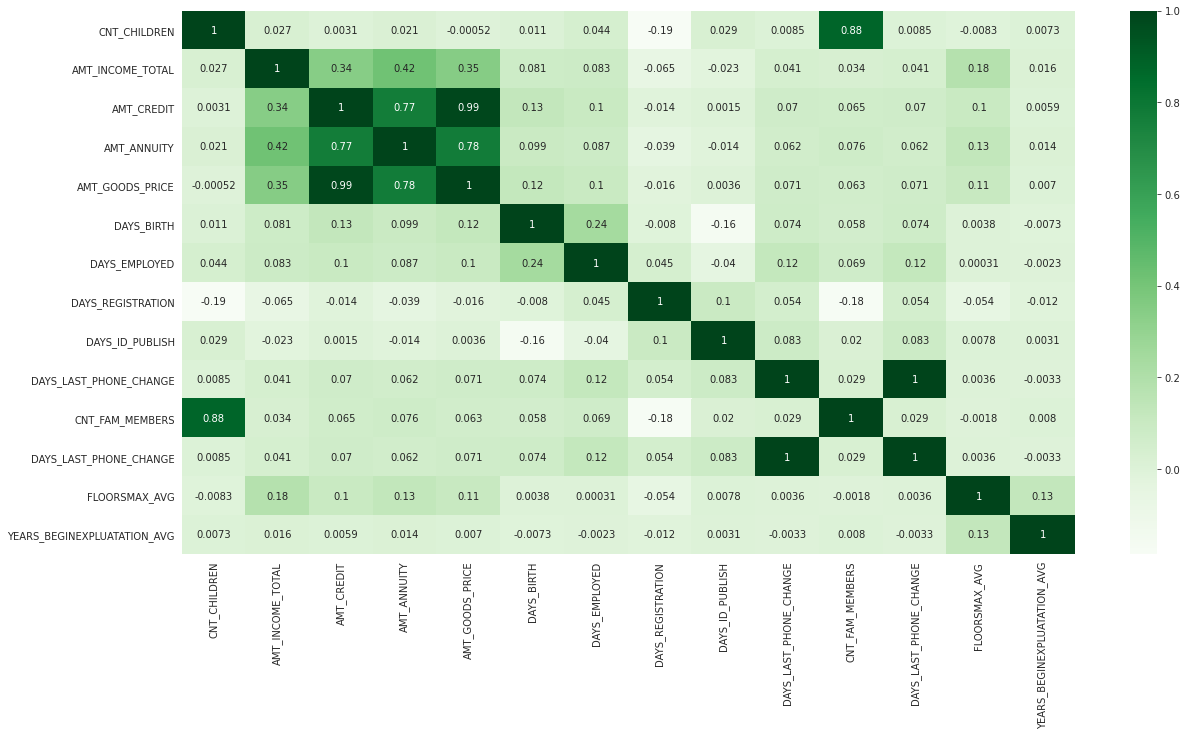

In [ ]:
#Heatmap of the selected variables in target 0
corr_map = df_app_target_0[continuous_vars].corr()

plt.figure(figsize=(20,10))
g = sns.heatmap(corr_map,annot=True,cmap="Greens")

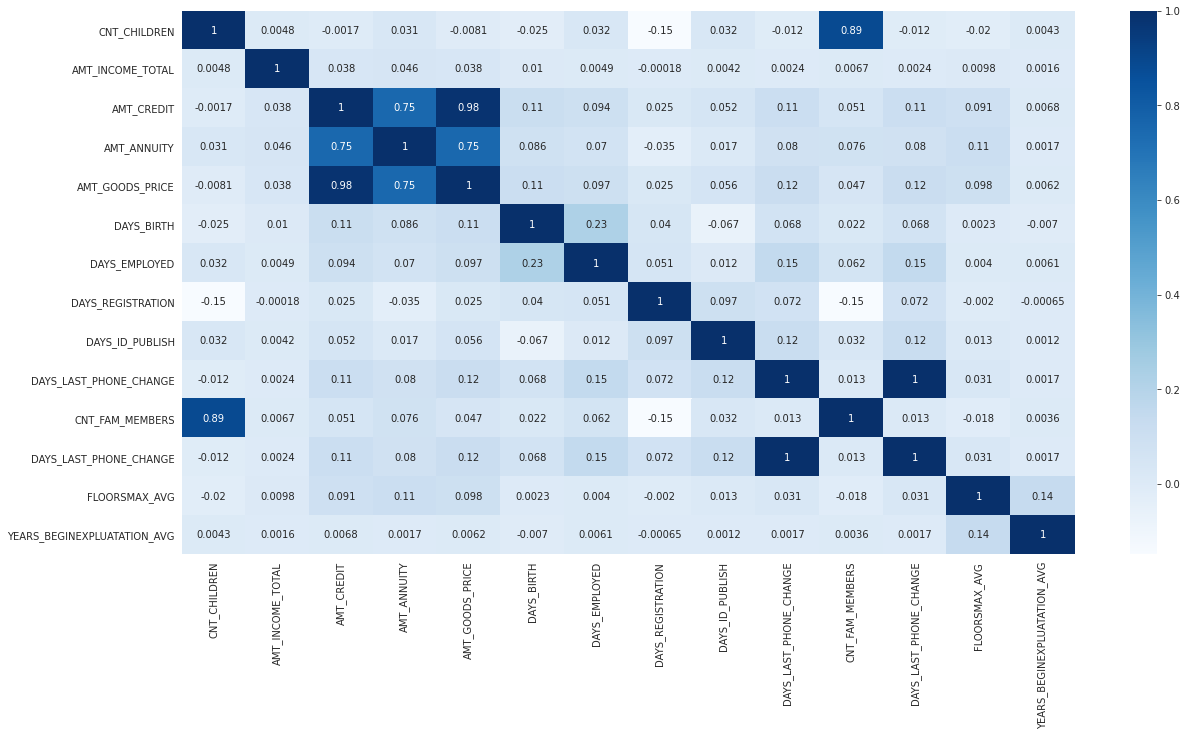

In [ ]:
corr_map = df_app_target_1[continuous_vars].corr()

plt.figure(figsize=(20,10))
g = sns.heatmap(corr_map,annot=True,cmap="Blues")

Both the corelation heatmaps for target 0 and target 1 have a similar pattern since they have been taken from the same dataset.

The following columns seems to be highly positively correlated:

1.   Amount Credit and Amount Annuity (0.75)
2.   Amount Annuity and Amount Goods Price (0.75)
3.   Number of children and Number of Family members (0.89)
4.   Amount Goods Price and Amount Credit (0.98)

But in Target 0, the following feature pairs seems to to have higher positive correlation compared to in Target 1

1. Amount income total and Amount credit
2. Amount income total and Amount annuity
3. Amount income total and Amount goods price


###8.2 Correlation of columns with respect to TARGET column for the complete application dataset
Below are top positive and negative correlated columns with TARGET

In [ ]:
corr = df_app.corr()['TARGET'].sort_values(ascending = False)
corr.head(16) #Top 15 positive correlative colmns with TARGET

TARGET                         1.000000
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
Name: TARGET, dtype: float64

In [ ]:
corr.tail(16).sort_values(ascending = True) #Top 15 negative correlative colmns with TARGET

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
DAYS_LAST_PHONE_CHANGE       -0.055218
DAYS_ID_PUBLISH              -0.051457
DAYS_EMPLOYED                -0.046052
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
DAYS_REGISTRATION            -0.042011
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
TOTALAREA_MODE               -0.032596
AMT_CREDIT                   -0.030369
FLAG_DOCUMENT_6              -0.028602
HOUR_APPR_PROCESS_START      -0.024166
FLAG_PHONE                   -0.023806
Name: TARGET, dtype: float64

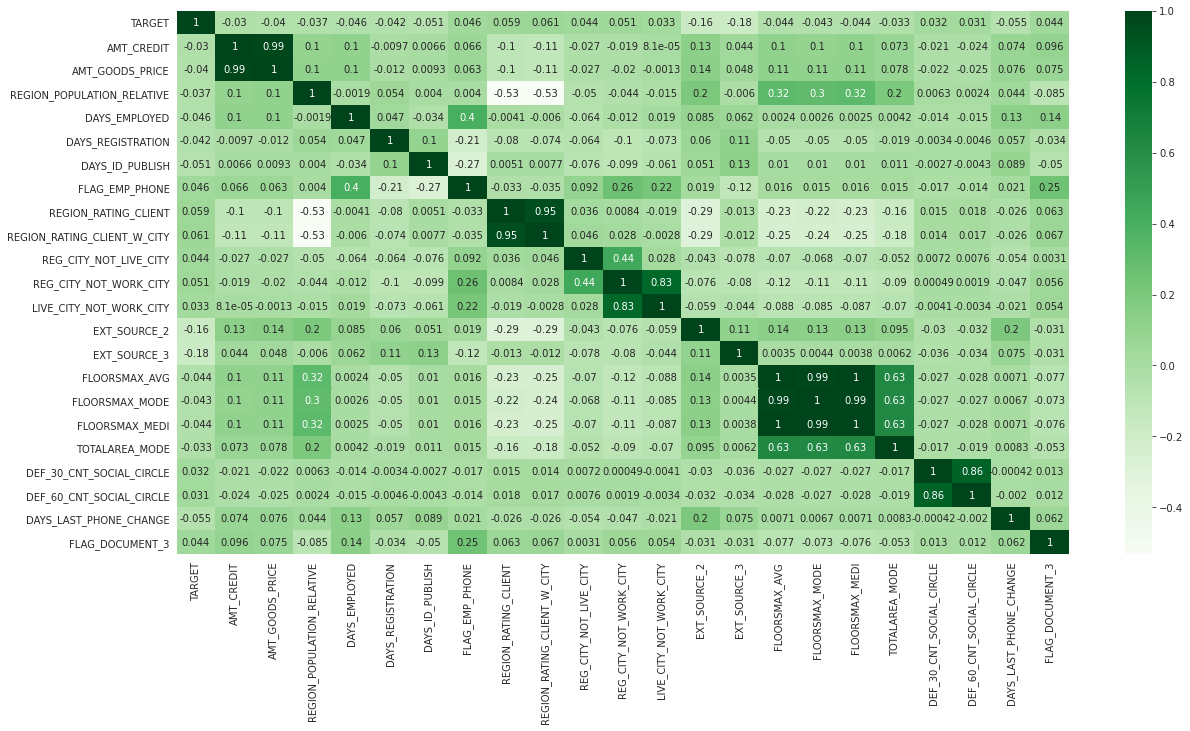

In [ ]:
#Correlation heat map of the complete dataset

corr_map = df_app.corr()
top_corr_features = corr_map.index[abs(corr_map["TARGET"])>=0.03]
plt.figure(figsize=(20,10))
g = sns.heatmap(df_app[top_corr_features].corr(),annot=True,cmap="Greens")

5.6
Analysis of numerical columns

## 9. Previous application data analysis 

In [ ]:
df_previous = pd.read_csv('previous_application.csv')


In [ ]:
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print('Shape of the dataframe \'df_previous\':\n rows={0} and columns={1}'.format(df_previous.shape[0],df_previous.shape[1]))
df_previous.shape

Shape of the dataframe 'df_previous':
 rows=1670214 and columns=37


(1670214, 37)

In [ ]:
df_previous.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


checking the info about df_previous dataframe

In [ ]:
df_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

Checking the columns with higher then 50 percent missing values in df_previous dataframe
Dropping the columns from the dataframe

In [ ]:
df_previous_cols = cols_missing_val(df_previous,50)
print('Number of cols with percent of missing values higher than {0} percent = {1} cols'.format(col_cutoff,len(df_previous_cols)))
print('\nList of columns we are dropping from the DATAFRAME \'df_app\' is \n',df_previous_cols)
print('\nShape of the dataframe before dropping the columns:\nrows={} and cols={}'.format(df_previous.shape[0],df_previous.shape[1]))
print('\nDropping the columns...')
df_previous.drop(columns=df_previous_cols, inplace=True)
print('\nShape of the dataframe post dropping the columns:\nrows={} and cols={}'.format(df_previous.shape[0],df_previous.shape[1]))

Number of cols with percent of missing values higher than 50 percent = 4 cols

List of columns we are dropping from the DATAFRAME 'df_app' is 
 ['RATE_INTEREST_PRIVILEGED', 'RATE_INTEREST_PRIMARY', 'RATE_DOWN_PAYMENT', 'AMT_DOWN_PAYMENT']

Shape of the dataframe before dropping the columns:
rows=1670214 and cols=37

Dropping the columns...

Shape of the dataframe post dropping the columns:
rows=1670214 and cols=33


###9.1 Merging the application data with the previous application dataset

In [ ]:
df_merge = df_app.merge(df_previous,left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')
df_merge.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_REGISTRATION_GROUP,AMT_CREDIT_GROUP,AMT_ANNUITY_GROUP,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25.920548,1.745205,9.994521,5.808219,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,3.106849,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,10-15 years,MEDIUM,MEDIUM,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-5 years,HIGH,HIGH,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45.931507,3.254795,3.249315,0.797260,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,2.268493,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-5 years,HIGH,HIGH,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,

In [ ]:
val = [a for a in df_merge.columns if 'AMT' in a]
print(val)

['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_CREDIT_GROUP', 'AMT_ANNUITY_GROUP', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y']


###9.2 Feature wise analysis of the previous application dataset

In [ ]:
def plot_cat(df,ctgry_col,tgt_col,horizontal_layout=True):
    if(horizontal_layout):
        fig, ax = plt.subplots(1,3, figsize=(15,6))
    else:
        fig, ax = plt.subplots(3,1, figsize=(15,14))
    t = df[ctgry_col].value_counts()
    df_count = pd.DataFrame({ctgry_col:t.index,'Count':t.values})
    s=sns.barplot(ax = ax[0], x=ctgry_col, y='Count', data = df_count )
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    #ax[0].set_xticklables(ctgry_col,rotation = 90)
    ax[0].set_title('# of customers based on '+ctgry_col)
    s=sns.countplot(ctgry_col, hue = tgt_col, data = df, ax = ax[1])
    ax[1].set_title('Defaulter based on '+ctgry_col)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    ctgry_perc = df[[ctgry_col, tgt_col]].groupby(ctgry_col).mean().reset_index()
    ctgry_perc[tgt_col] = ctgry_perc[tgt_col].apply(lambda x:x*100)
    s=sns.barplot(x = ctgry_col, y=tgt_col, order=ctgry_perc[ctgry_col], data=ctgry_perc,color = 'Red', ax = ax[2])
    ax[2].set_title('Defaulter Percentage based on '+ctgry_col)
    plt.ylabel('Percentage of Default(TARGET = 1)')   
    s.set_xticklabels(s.get_xticklabels(),rotation=90)#plt.xticks(rotation=90)
    return plt.show()

In [ ]:
def plot_catnew(df,ctgry_col,tgt_col,horizontal_layout=True):
    if(horizontal_layout):
        fig, ax = plt.subplots(1,2, figsize=(15,6))
    else:
        fig, ax = plt.subplots(2,1, figsize=(15,14))
    t = df[ctgry_col].value_counts()
    df_count = pd.DataFrame({ctgry_col:t.index,'Count':t.values})
    s=sns.barplot(ax = ax[0], x=ctgry_col, y='Count', data = df_count)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    #ax[0].set_xticklables(ctgry_col,rotation = 90)
    ax[0].set_title('# of aplications based on '+ctgry_col)
    s=sns.countplot(ctgry_col, hue = tgt_col, data = df, ax = ax[1])
    ax[1].set_title('Detail of previuos loan status based on '+ctgry_col)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    return plt.show()

####9.2.1 NAME_CONTRACT_STATUS

Plot between 'NAME_CONTRACT_STATUS' and 'TARGET' in merged data set

This shows that customers who have active loan had their previous applications also approved.
Percentage of defaulters for current loan who had their previous application Rejected is 12%, followed by Cancelled with 9%, Unused offer 8% and Approved with 7.5%.
This clearly shows that custoemrs who had their previous applications rejected or cancelled have more percentage of default in current loan.

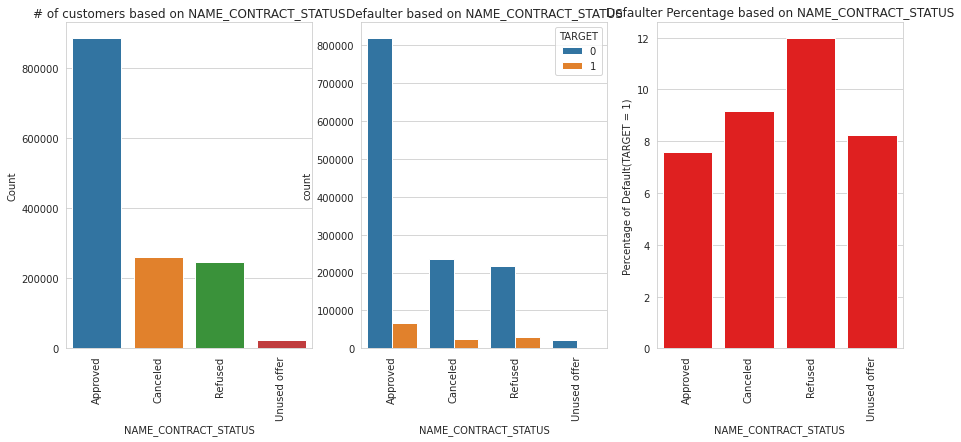

In [ ]:
plot_cat(df_merge,'NAME_CONTRACT_STATUS','TARGET')

####9.2.2 CODE_REJECT_REASON

Plot between 'CODE_REJECT_REASON' and 'NAME_CONTRACT_STATUS'<br>
This plot shows that ~180K previous application of customers(who have an active loan now) were rejected due to reason "HC"
Around ~50K previous application of customers(who have an active loan now) were rejected due to reason "LIMIT"

Plot between 'CODE_REJECT_REASON' and 'TARGET'<br>
This plot shows that ~21% customers who are default on current loan are those whose previous application was rejected due to "SCOFR", followed by "LIMIT" with 12.5%

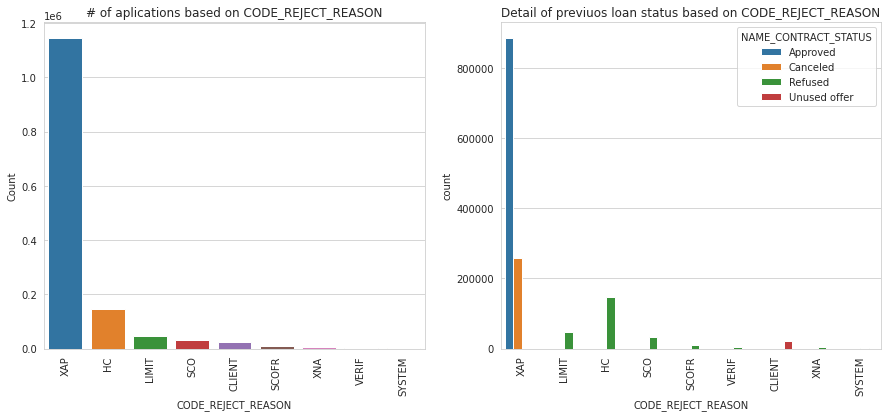

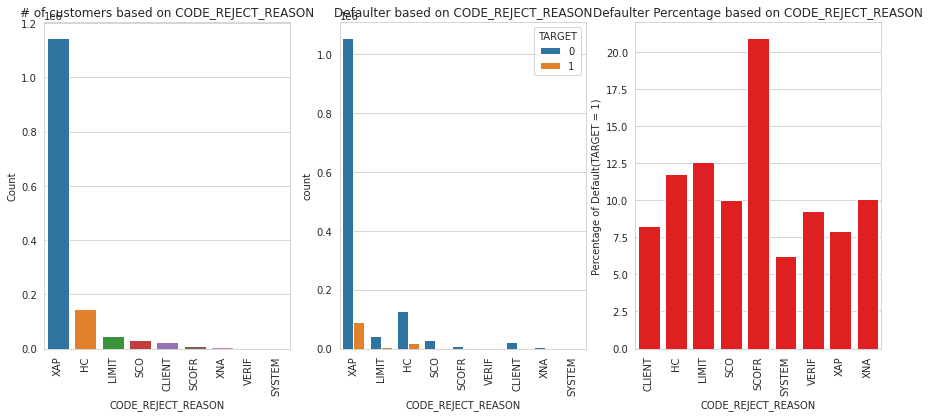

In [ ]:
plot_catnew(df_merge,'CODE_REJECT_REASON','NAME_CONTRACT_STATUS')
plot_cat(df_merge,'CODE_REJECT_REASON','TARGET')

####9.2.3 NAME_PAYMENT_TYPE

Plot between 'NAME_PAYMENT_TYPE' and 'NAME_CONTRACT_STATUS'

This plot shows that for ~700K of previous approved applications the payment method was through cash deposit in bank

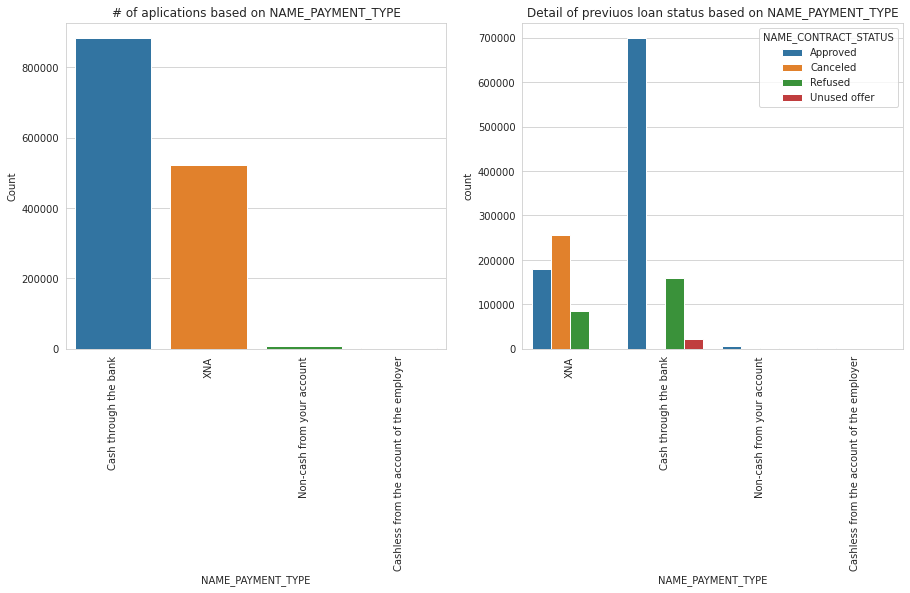

In [ ]:
plot_catnew(df_merge,'NAME_PAYMENT_TYPE','NAME_CONTRACT_STATUS')

####9.2.4 NAME_PORTFOLIO

Plot bwetween 'NAME_PORTFOLIO' and 'TARGET'<br>
10% of people who are default on current loan had their previous loan for CARDS portfolio
9% of people who are default on current loan had their previous loan for CASH portfolio

Plot between 'NAME_PORTFOLIO' and 'NAME_CONTRACT_STATUS'<br>
This plot shows that majority of loans were aprroved for POS portfolio
Majority of rejections were for CASH portfolio

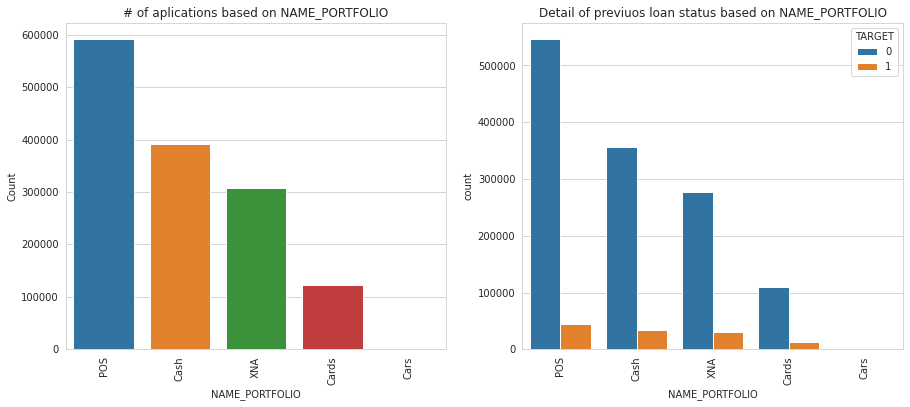

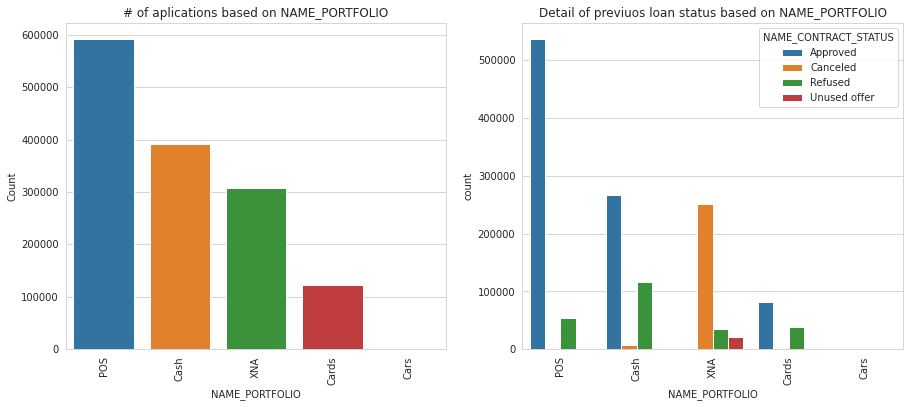

In [ ]:
plot_catnew(df_merge,'NAME_PORTFOLIO','TARGET')
plot_catnew(df_merge,'NAME_PORTFOLIO','NAME_CONTRACT_STATUS')

####9.2.5 CHANNEL_TYPE

Plot between 'CHANNEL_TYPE' and 'NAME_CONTRACT_STATUS'<br>
This plot shows that majority of previous applications were thorugh the channel "CREDIT and CASH OFFICES" but the majority of approved applcations were through the channel "COUNTRY WIDE"

Plot between 'CHANNEL_TYPE' and 'TARGET'<br>
This plot shows that 13% of defaulters on current loan had their previous application thorugh the channel "AP+CASH LOAN"

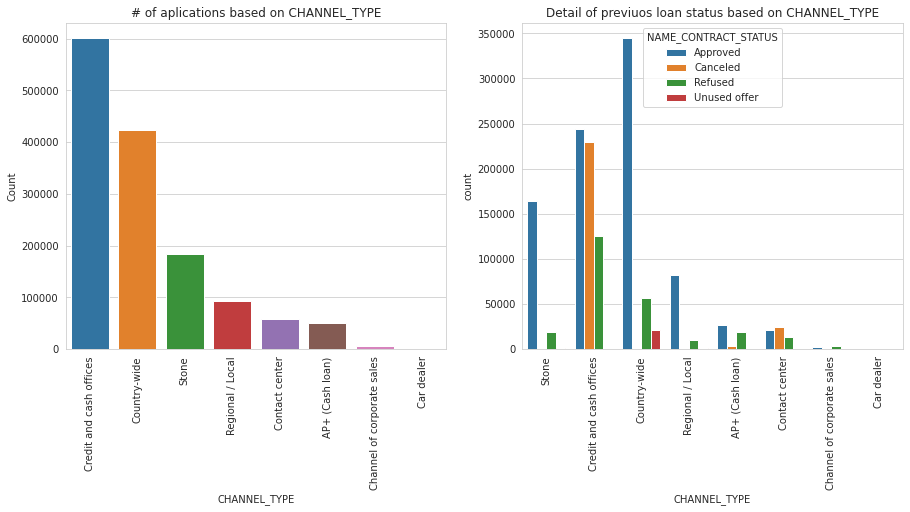

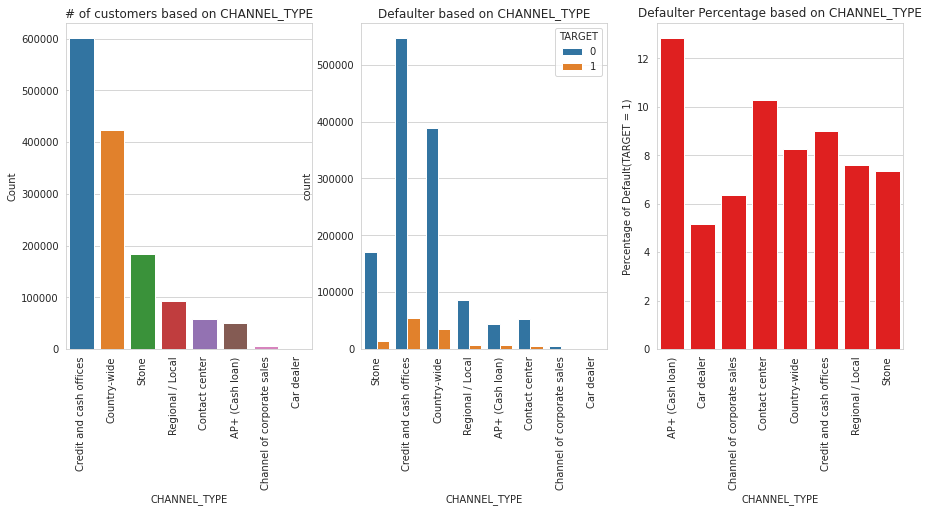

In [ ]:
plot_catnew(df_merge,'CHANNEL_TYPE','NAME_CONTRACT_STATUS')
plot_cat(df_merge,'CHANNEL_TYPE','TARGET')

####9.2.6 NAME_YIELD_GROUP

Plot between 'NAME_YIELD_GROUP' and 'NAME_CONTRACT_STATUS'<br>
This plot shows that majority of previous applications approved was for MIDDLE interest rate group

Plot between 'NAME_YIELD_GROUP' and 'TARGET'<br>
This plot shows that 9.8% and 8% of defaulters on current loan were from HIGH and MIDDLE interest groups repectively.


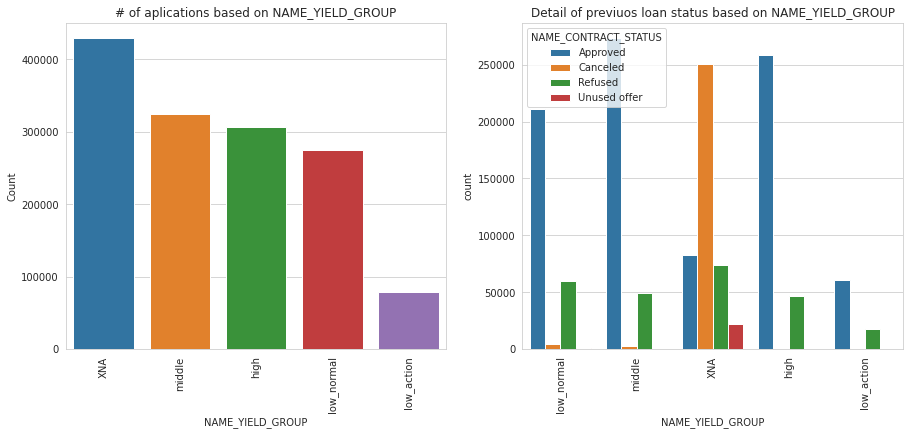

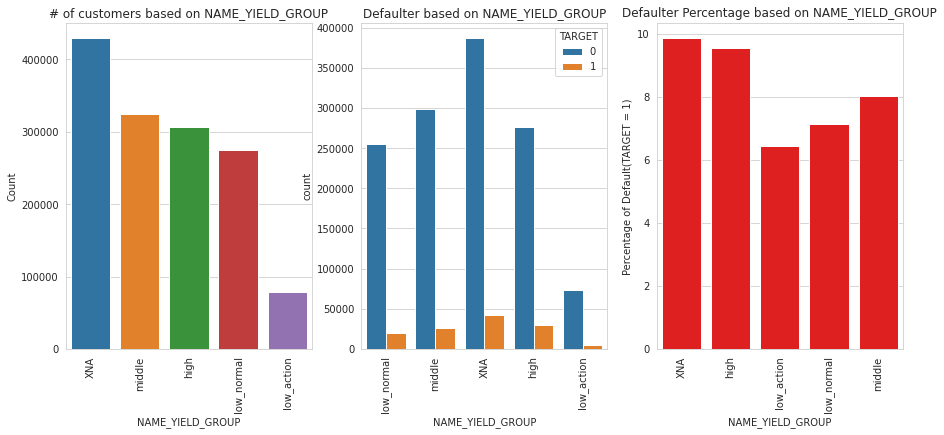

In [ ]:
plot_catnew(df_merge,'NAME_YIELD_GROUP','NAME_CONTRACT_STATUS')

plot_cat(df_merge,'NAME_YIELD_GROUP','TARGET')

####9.2.7 NAME_PRODUCT_TYPE

Plot between 'NAME_PRODUCT_TYPE' and 'NAME_CONTRACT_STATUS'<br>
This plot shows that x-sell has more approved loand compared to walk-in
Walk-in type had more rejections wiht respect to it's count

Plot between 'NAME_PRODUCT_TYPE' and 'TARGET'<br>
12.5% of defaulters of current loan had their previous application through walk-in

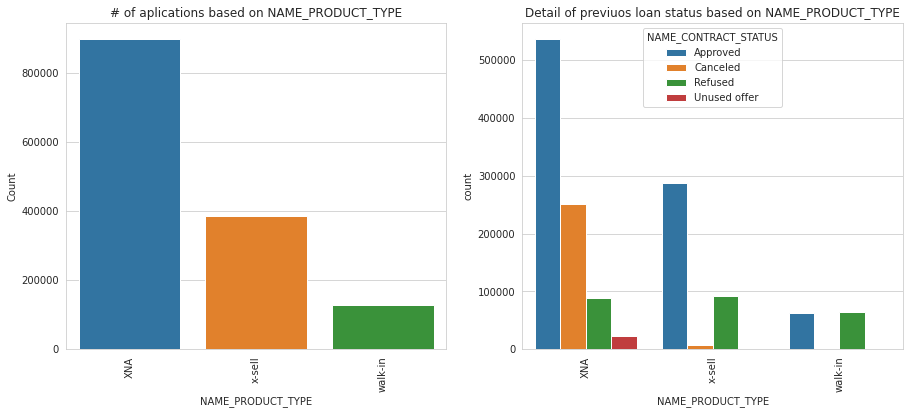

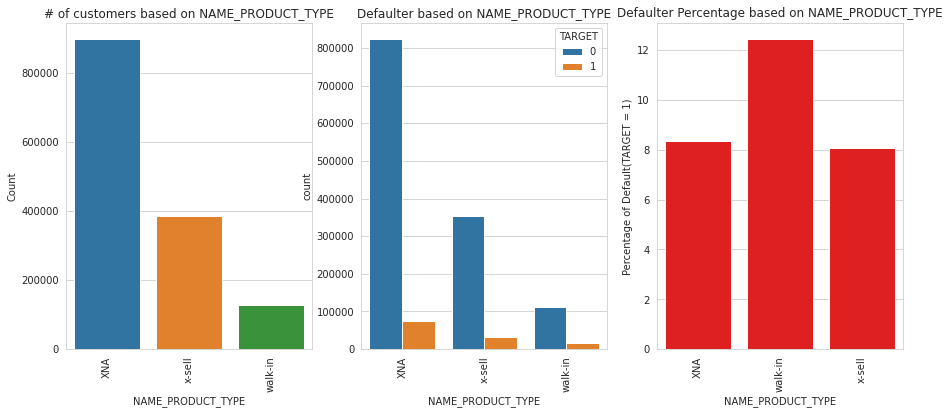

In [ ]:
plot_catnew(df_merge,'NAME_PRODUCT_TYPE','NAME_CONTRACT_STATUS')

plot_cat(df_merge,'NAME_PRODUCT_TYPE','TARGET')

Plot between 'NAME_CASH_LOAN_PURPOSE' and 'NAME_CONTRACT_STATUS'<br>
This plot shows that cutomers have taken cash loan mainly for repairs(ignoring XNA and XAP)

Plot between 'NFLAG_INSURED_ON_APPROVAL' and 'NAME_CONTRACT_STATUS'<br>
This plot shows that majority of customers whose previous applications were aproved didn't ask for isurance

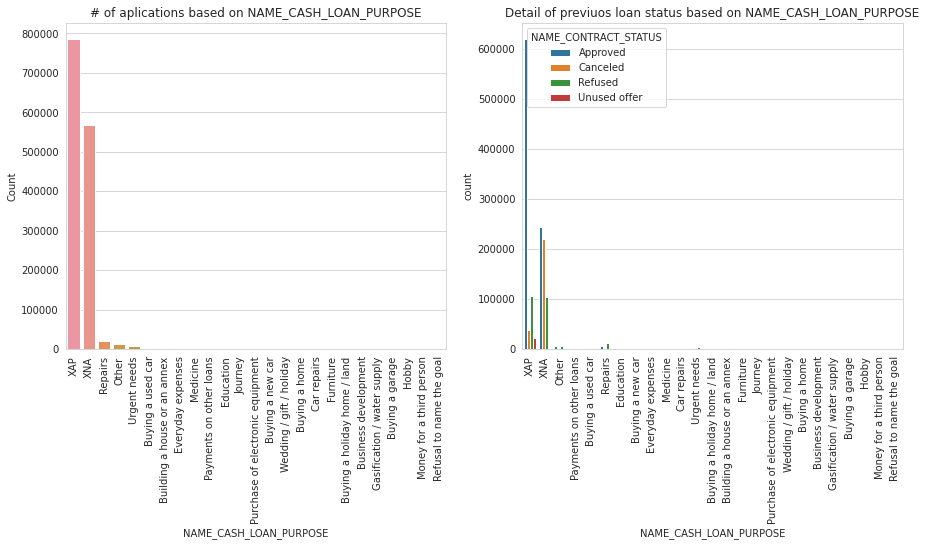

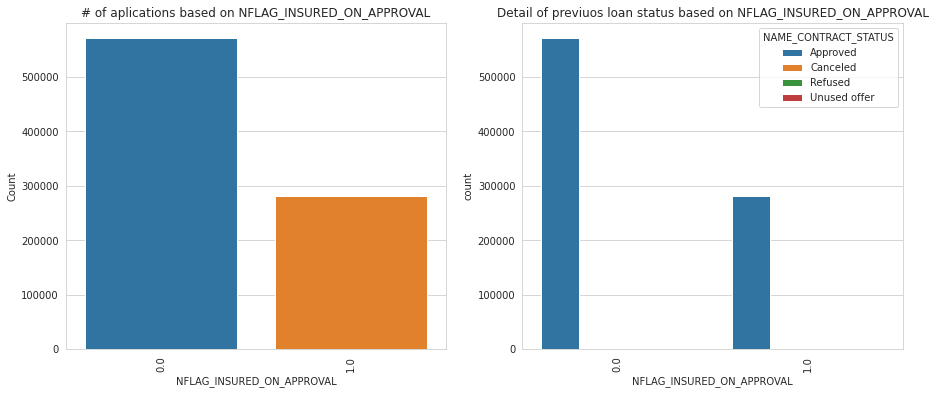

In [ ]:
plot_catnew(df_merge,'NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS')
plot_catnew(df_merge,'NFLAG_INSURED_ON_APPROVAL','NAME_CONTRACT_STATUS')